**ML-2 Project - Dataset 1 - Marketing Campaign Response (Classification)**

Comparison between state of the art ML algorithms (Random Forest, XGBoost, SVM, Logistic Regression for classification and Multiple Linear Regression, SVM Regression, and Random Forest Regression for regression) and MCMC Methods. 

- **Call Center Data:**
https://www.kaggle.com/satvicoder/call-center-data?select=Call+Center+Data.csv

- **Inventory Demand:**
https://www.kaggle.com/flenderson/sales-analysis

- **Sales Forecasting (through Regression):**
https://www.kaggle.com/aungpyaeap/supermarket-sales

- **Telecom Churn:**
https://www.kaggle.com/jpacse/datasets-for-churn-telecom
    * LoS prediction on Tabba dataset (Nafeesa, extension of ML-1 project)

- **Credit Card Fraud:**
https://www.kaggle.com/mlg-ulb/creditcardfraud

- **Marketing Campaign:**
https://www.kaggle.com/rodsaldanha/arketing-campaign




All analyses to be performed in the notebook (no need to write a report). For your analyses, use Markdown cells
- Select any one of the above datasets
- Clean the dataset if needed
- Perform EDA thoroughly (as taught in ML-1) and write down analyses
- Determine the column to be predicted and the predictors
- Do some research to determine the prior and the likelihood functions along with proper justifications.
- Perform ML on your dataset using the set of classification/regression algorithms as outlined above
- Perform MCMC and compare the predictive results thoroughly with ML results



**Bonus marks to be given for following a cleaning/EDA template, ML template and MCMC template (Note: you can merge all three above into one single template)**

**Bonus marks to be given for using multiple performance measures with predictive results demonstrated thoroughly through all relevant graphs and tables**

*Basically, marks will be given on how well you are able to design the MCMC problem so that the results are at par or better than ML results (in fact, this is the whole project). You will need to do much research on designing the likelihood and the priors and also on the selection of the predictors. Remember that MCMC methods are slower than ML algorithms but they might be more effective in the long run.  Also tune for hyperparameters for both ML and MCMC methods.* 


**Deadline: 31st December, 2021**


**Required:**

- Notebook (all analyses within)

- A 2-3 minute video of your project - basically  a notebook demo

**Some more datasets to try:**

- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

- https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

- https://archive.ics.uci.edu/ml/datasets/Cargo+2000+Freight+Tracking+and+Tracing

- https://archive.ics.uci.edu/ml/datasets/Educational+Process+Mining+%28EPM%29%3A+A+Learning+Analytics+Data+Set



In [1]:
#Importing required packages

try:
    from xgboost import XGBClassifier
except:
    print("Failed to import xgboost, make sure you have xgboost installed")
    print("Use following command to install it: pip install xgboost")
    XGBClassifier = None

try:
    import lightgbm as lgb
except:
    print("Failed to import lightgbm, make sure that you have lightgbm installed")
    print("Use following command to install it: conda install -c conda-forge lightgbm")
    lgb = None
    
#importing multiprocessing to keep up with the compute power needed
import multiprocessing


#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import math
import warnings
import matplotlib.pyplot as plt        
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn import preprocessing

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score

#import regularization libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

# import scaling
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
sb.set(color_codes=True, font_scale=1.2)

#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
import datetime
import string
from sklearn.impute import KNNImputer
%matplotlib inline
import tkinter as tk
from tkinter import filedialog
import pylab 
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sb

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")
sb.set(color_codes=True, font_scale=1.2)

from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#importing class balancing libraries
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

**Importing Templates (Wherever possible, functions taken from the templates will be defined within this notebook so the templates don't have to be referred to again and again)**

In [2]:
#Importing my personal data wrangling and MVA template developed in ML 1 class
from Yawar_Wrangling_Template import yawar_wrangling_KNN as wrn

# Importing my personal ML Algorithms template developed in ML 1 class
import Yawar_MLTemplate as ml

#Importing clustering playground

import ClusterPlayground_Yawar as clust

### Load and Summarise Dataset at hand

**Context**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

    1) AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
    2) AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
    3) AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
    4) AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
    5) AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
    6) Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise 
    7) Complain - 1 if customer complained in the last 2 years
    8) DtCustomer - date of customer’s enrolment with the company
    9) Education - customer’s level of education
    10) Marital - customer’s marital status
    11) Kidhome - number of small children in customer’s household
    12) Teenhome - number of teenagers in customer’s household
    13) Income - customer’s yearly household income
    14) MntFishProducts - amount spent on fish products in the last 2 years
    15) MntMeatProducts - amount spent on meat products in the last 2 years
    16) MntFruits - amount spent on fruits products in the last 2 years
    17) MntSweetProducts - amount spent on sweet products in the last 2 years
    18) MntWines - amount spent on wine products in the last 2 years
    19) MntGoldProds - amount spent on gold products in the last 2 years
    20) NumDealsPurchases - number of purchases made with discount
    21) NumCatalogPurchases - number of purchases made using catalogue
    22) NumStorePurchases - number of purchases made directly in stores
    23) NumWebPurchases - number of purchases made through company’s web site
    24) NumWebVisitsMonth - number of visits to company’s web site in the last month
    25) Recency - number of days since the last purchase


In [3]:
# Defining function | Also present in our template
def read_csv(filename):
    try:
        df= pd.read_csv(filename, skipinitialspace=True)
    except:
        df= pd.read_csv(filename, skipinitialspace=True)
        
    return df


#loading df

FILE_NAME = 'marketing_campaign.csv'
LABEL_COL = "Response"

df = read_csv(FILE_NAME)

print('\nDATA PREVIEW:')
display(df.head())
print('\nDATA SHAPE:')
print(df.shape)
print('\nCOLUMN DATA TYPES:')
print(df.dtypes)


DATA PREVIEW:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0



DATA SHAPE:
(2240, 29)

COLUMN DATA TYPES:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


**This dataset has 29 features/columns for 2240 customers**

In [4]:
df.describe(
    include='all'
)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


0    1906
1     334
Name: Response, dtype: int64


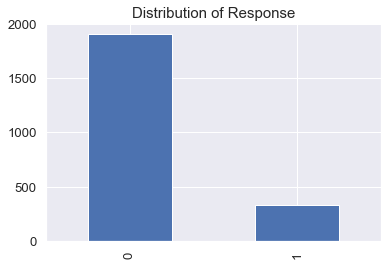

In [5]:
# Plotting barchart of class column

def barchart(df,col):
        df[col].value_counts().plot(kind='bar')
        print(df[col].value_counts())
        plt.title('Distribution of %s'%col, fontsize=15)
        
barchart(df, LABEL_COL)

**As we can see the customer response to the 5 campaigns is very low; only 334 customers responded positively to the campaign**

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64


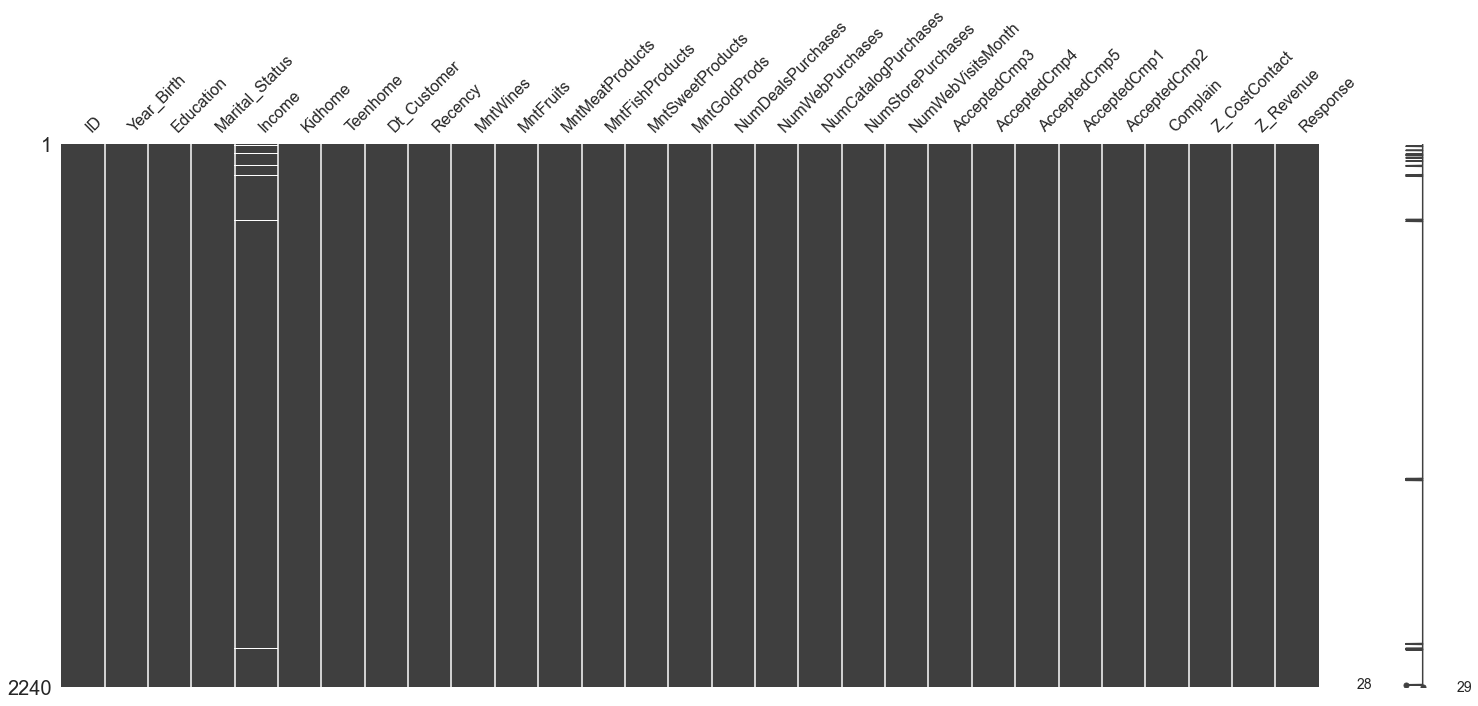

In [6]:
#Defining functionsto check MV
def check_mv(df):
        print(df.isnull().sum().sort_values(ascending=False))
        mano.matrix(df)


#checking Missing values

check_mv(
    df
)

#mano.matrix(df)

**There are 24 MVs in the income column, we will deal with these in the next section**

### Data Preprocessing

In [7]:
def cleaningup(df, to_date=[], to_numeric=[], cols_to_delete=[], fill_na_map={}, cols_to_drop_na_rows=[], cols_to_interpolate=[]):
    """
    We will perform all the generic cleanup stuff in this function,
    Data specific stuff should be handled by driver program.
    
    Mandatory Parameter:
    df : Dataframe to be cleaned
    
    Optional Parameters:
    to_date:  List of columns to convert to date
    to_numeric:  List of columns to convert to numeric
    cols_to_delete: All the useless columns that we need to delete from our dataset
    fill_na_map:  A dictionary containing map for column and a value to be filled in missing places
                    e.g. {'age': df['age'].median(), 'city': 'Karachi'}
    cols_to_drop_na_rows: List of columns where missing value in not tolerable and we couldn't risk predicting                     value for it, so we drop such rows.
    cols_to_interpolate: List of columns where missing values have to be replaced by forward interpolation
    """
    
    # columns to convert to date format
    def change_type_to_date(df, to_date):
        # Deal with incorrect data in date column
        for i in to_date:
            df[i] = pd.to_datetime(df[i], errors='coerce', infer_datetime_format=True)
        return df
    
    # columns to convert to numerical format
    def change_type_to_numeric(df, to_numeric):
        # Deal with incorrect data in numeric columns
        for i in to_numeric:
            df[i] = pd.to_numeric(df[i], errors='coerce')
        return df
    
    # columns to delete
    def drop_useless_colums(df, cols_to_delete):
        # Drop useless columns before dealing with missing values
        for i in cols_to_delete:
            df = df.drop(i, axis=1)
        return df
    
    # delete columns that have more than n% MV
    def drop_by_mvpercent(df,n):
        for i in df:
            y=df[i].isnull().sum()
            w=y/len(df[i])*100
            print(w)
            
            if w>n:
                df.drop(i,axis=1,inplace=True)
        
        return df
    
    #drop all rows which contain more than 40% missing values
    def drop_useless_rows(df):
        min_threshold = math.ceil(len(df.columns)*0.4)
        df = df.dropna(thresh=min_threshold)
        return df
    
    # drop rows in which columns specified by the driver program has missing values
    def drop_na_rows(df, cols_to_drop_na_rows):
        for i in cols_to_drop_na_rows:
            df = df.drop(df[df[i].isnull()].index)
        return df
    
    # Deal with missing values according to map, e.g., {'age': df['age'].median(), 'city': 'Karachi'}
    def fill_na_vals(df, fill_na_map):
        for col,val in fill_na_map.items():
            df[col].fillna(val, inplace=True)
        return df
    
    # Deal with missing values according to the interpolation
    def fill_na_interpolate(df, cols_to_interpolate):
        for i in cols_to_interpolate:
            df[i] = df[i].interpolate(method ='linear', limit_direction ='forward')
        return df
    
    try:
        df = change_type_to_date(df, to_date)
        df = change_type_to_numeric(df, to_numeric)
        df = drop_useless_colums(df, cols_to_delete)
        df = drop_useless_rows(df)
        df = drop_na_rows(df, cols_to_drop_na_rows)
        df = fill_na_vals(df, fill_na_map)
        df = fill_na_interpolate(df, cols_to_interpolate)
        print("df is all cleaned up..")
        return df
    except Exception as e:
        print("Failed to perform cleanup, exception=%s" % str(e))
    finally:
        return df

**Removing all rows with missing income since only 24 rows have MV**

df is all cleaned up..
ID                     0
NumDealsPurchases      0
Z_Revenue              0
Z_CostContact          0
Complain               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Response               0
dtype: int64


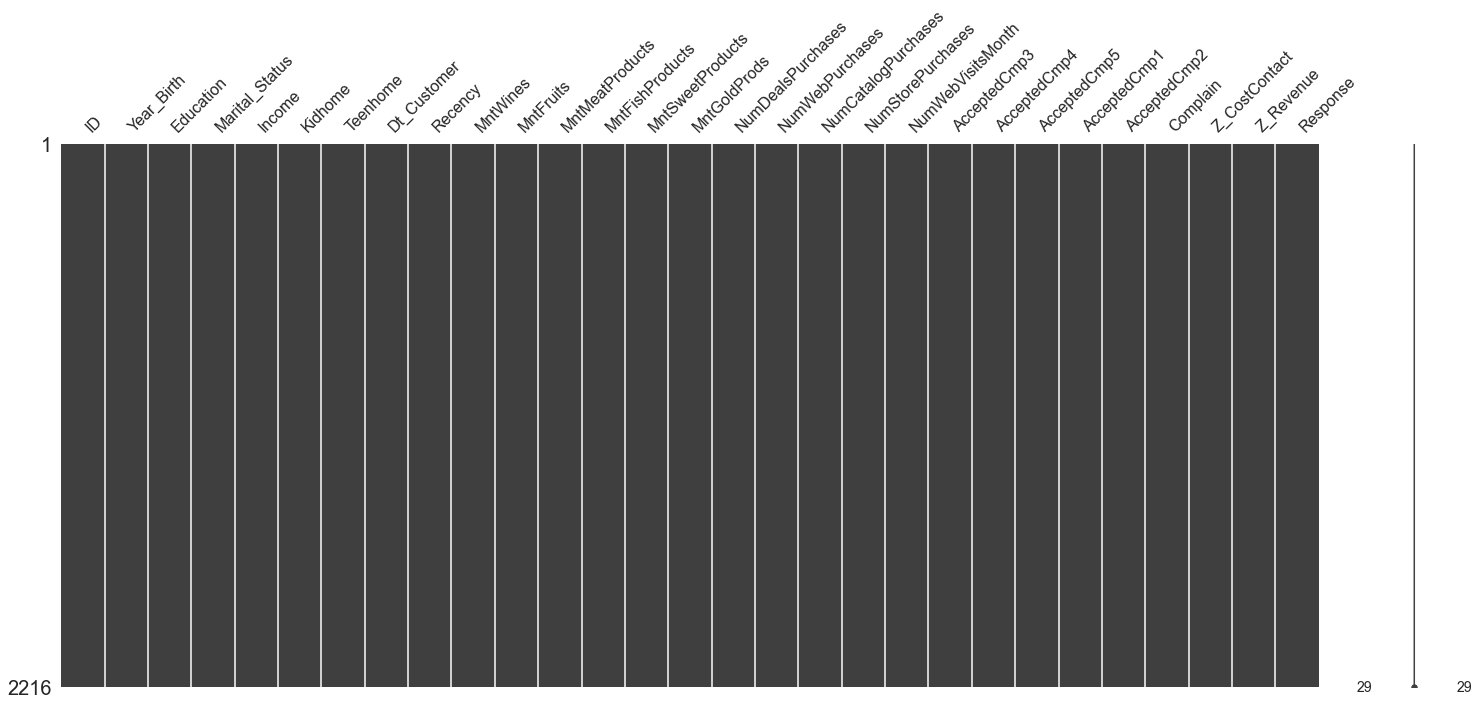

In [8]:

df = cleaningup(df, cols_to_drop_na_rows=['Income'])

check_mv(df)

In [9]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
#Converting the two date columns to date_time dtype
df = cleaningup(df, to_date=['Dt_Customer'])

df is all cleaned up..


In [11]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format= '%Y')
df.dtypes.head(10)

ID                         int64
Year_Birth        datetime64[ns]
Education                 object
Marital_Status            object
Income                   float64
Kidhome                    int64
Teenhome                   int64
Dt_Customer       datetime64[ns]
Recency                    int64
MntWines                   int64
dtype: object

In [12]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
from datetime import timedelta, datetime, date

#Calculating Age of Customer in days (for better accuracy for predictions)
df['Age_Days'] = (datetime.today() - df['Year_Birth']).dt.days

In [14]:
#Calculating since customer became a customer in days for continuity and accuracy

df['Customer_Since_days'] = (datetime.today() - df['Dt_Customer']).dt.days

In [15]:
#Dropping the ID Column, Year_Birth and Dt_Customer as it serves no purpose in predictions anymore

df = cleaningup(df, cols_to_delete=['ID', 'Year_Birth', 'Dt_Customer'
                                   ])
df.head()

df is all cleaned up..


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Days,Customer_Since_days
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,23742,3407
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,24838,2857
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,20820,3056
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,13881,2883
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,14976,2905


### Exploratory Data Analysis and Visualization

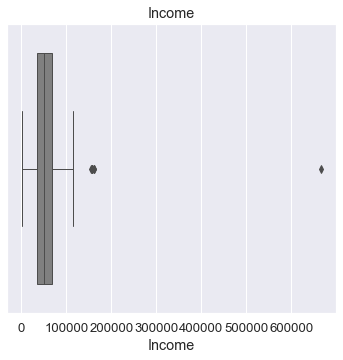

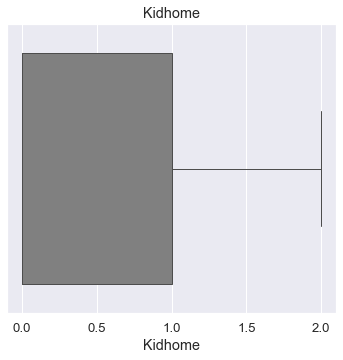

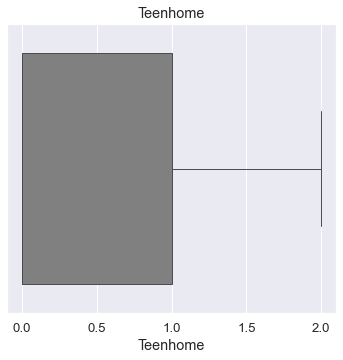

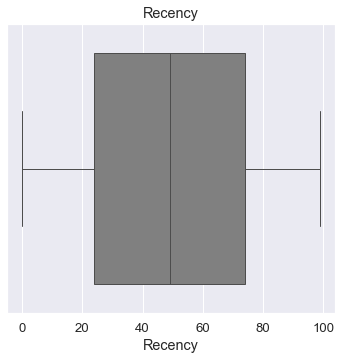

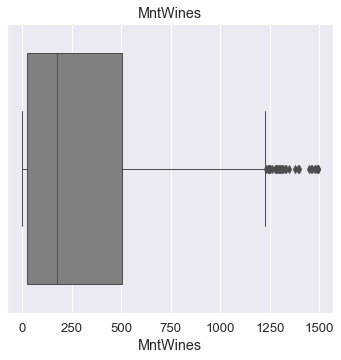

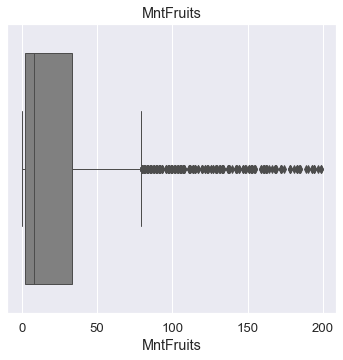

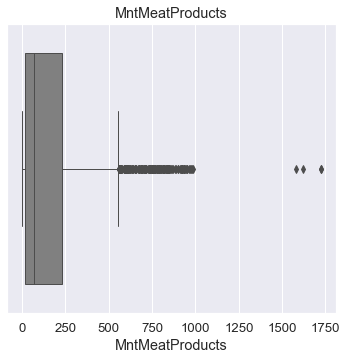

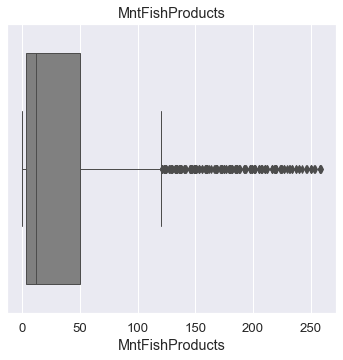

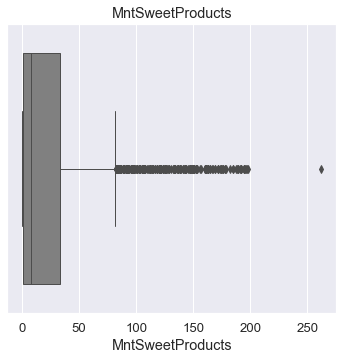

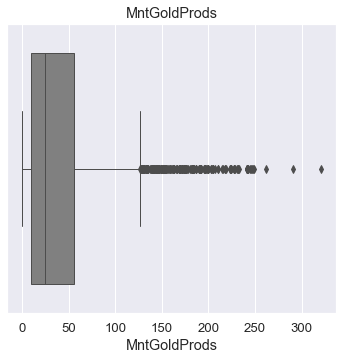

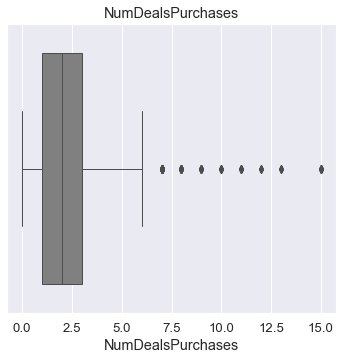

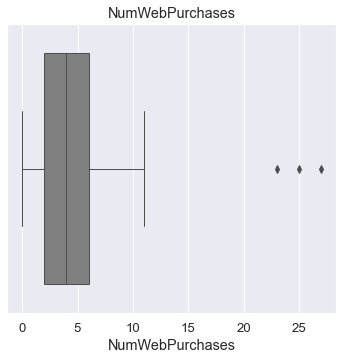

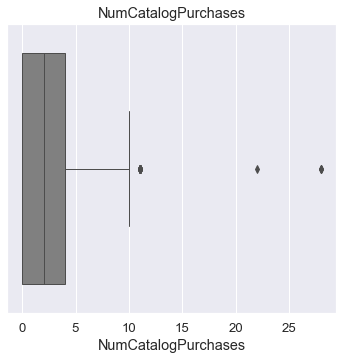

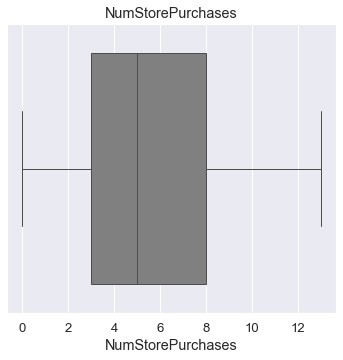

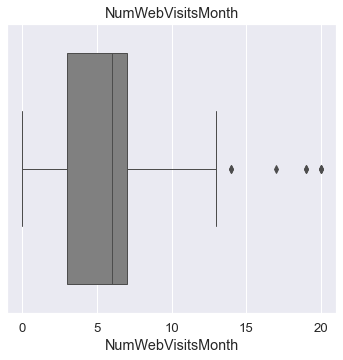

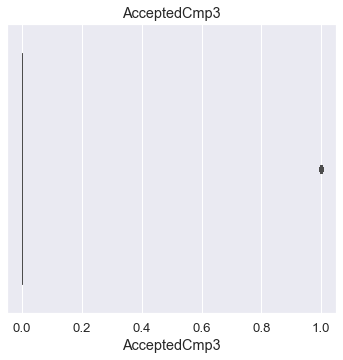

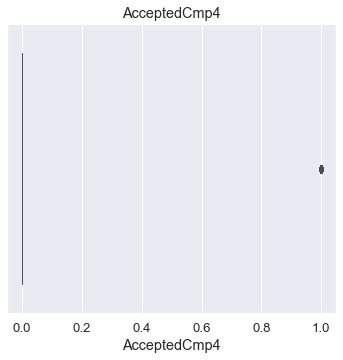

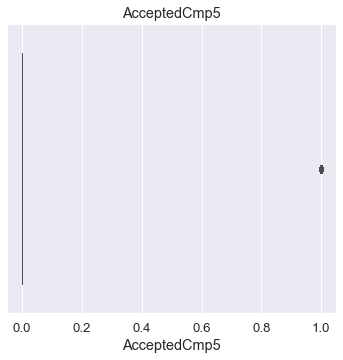

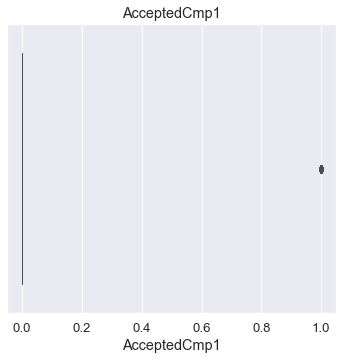

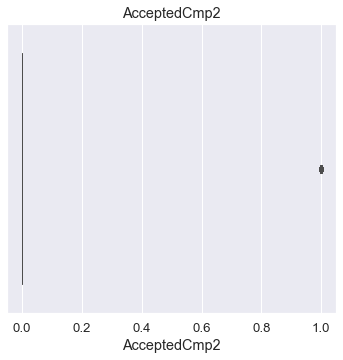

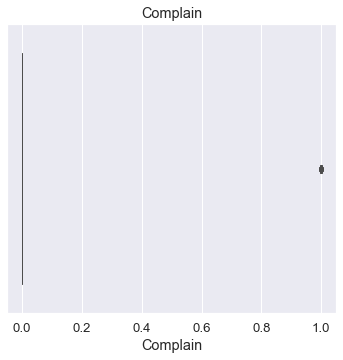

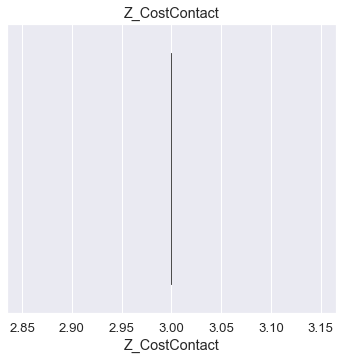

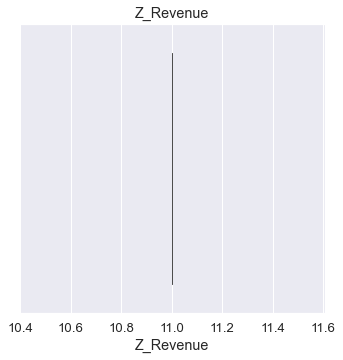

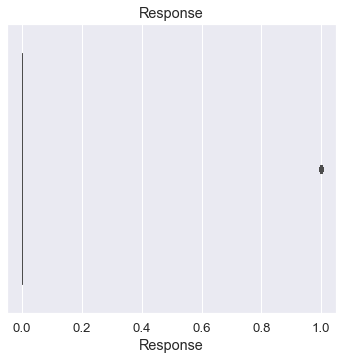

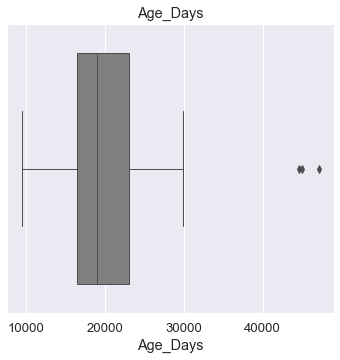

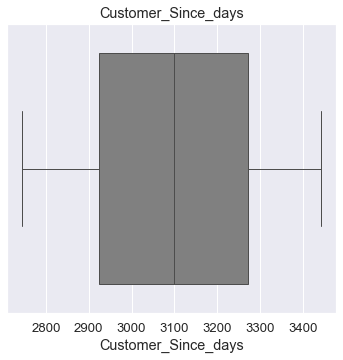

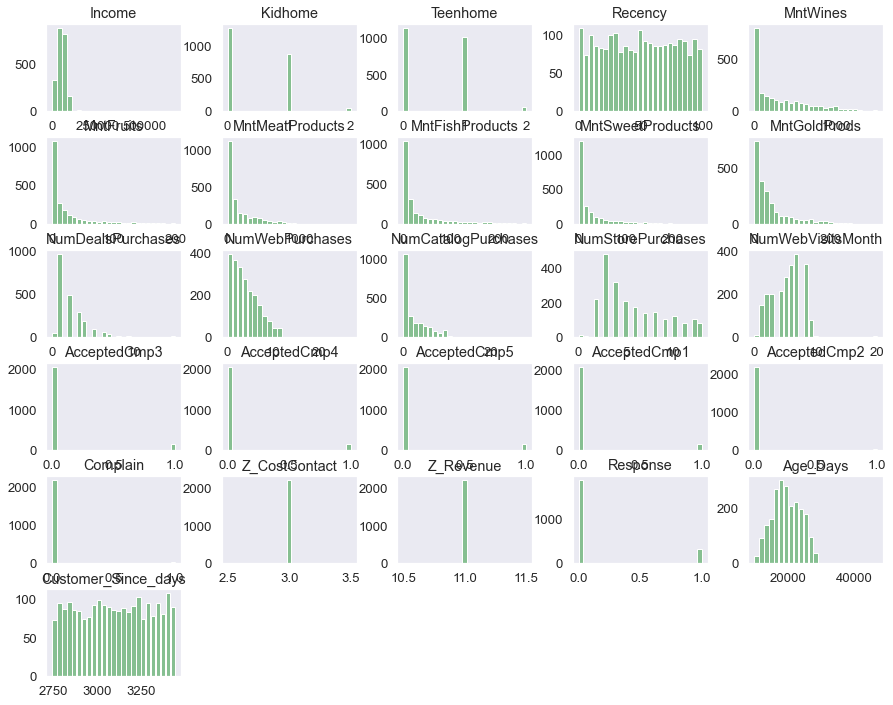

In [16]:
ml.numcolanalysis(df)

**We can observe that Age is normally distributed, rest of the parameters are mostly skewed**

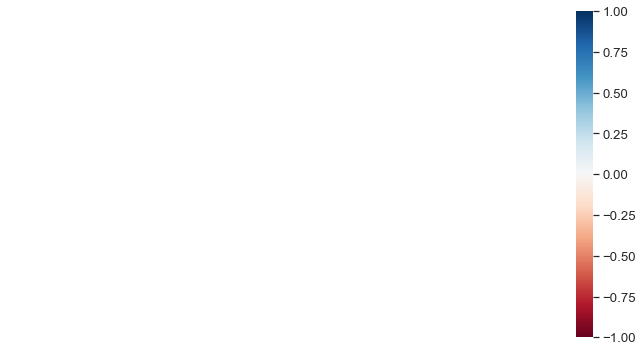

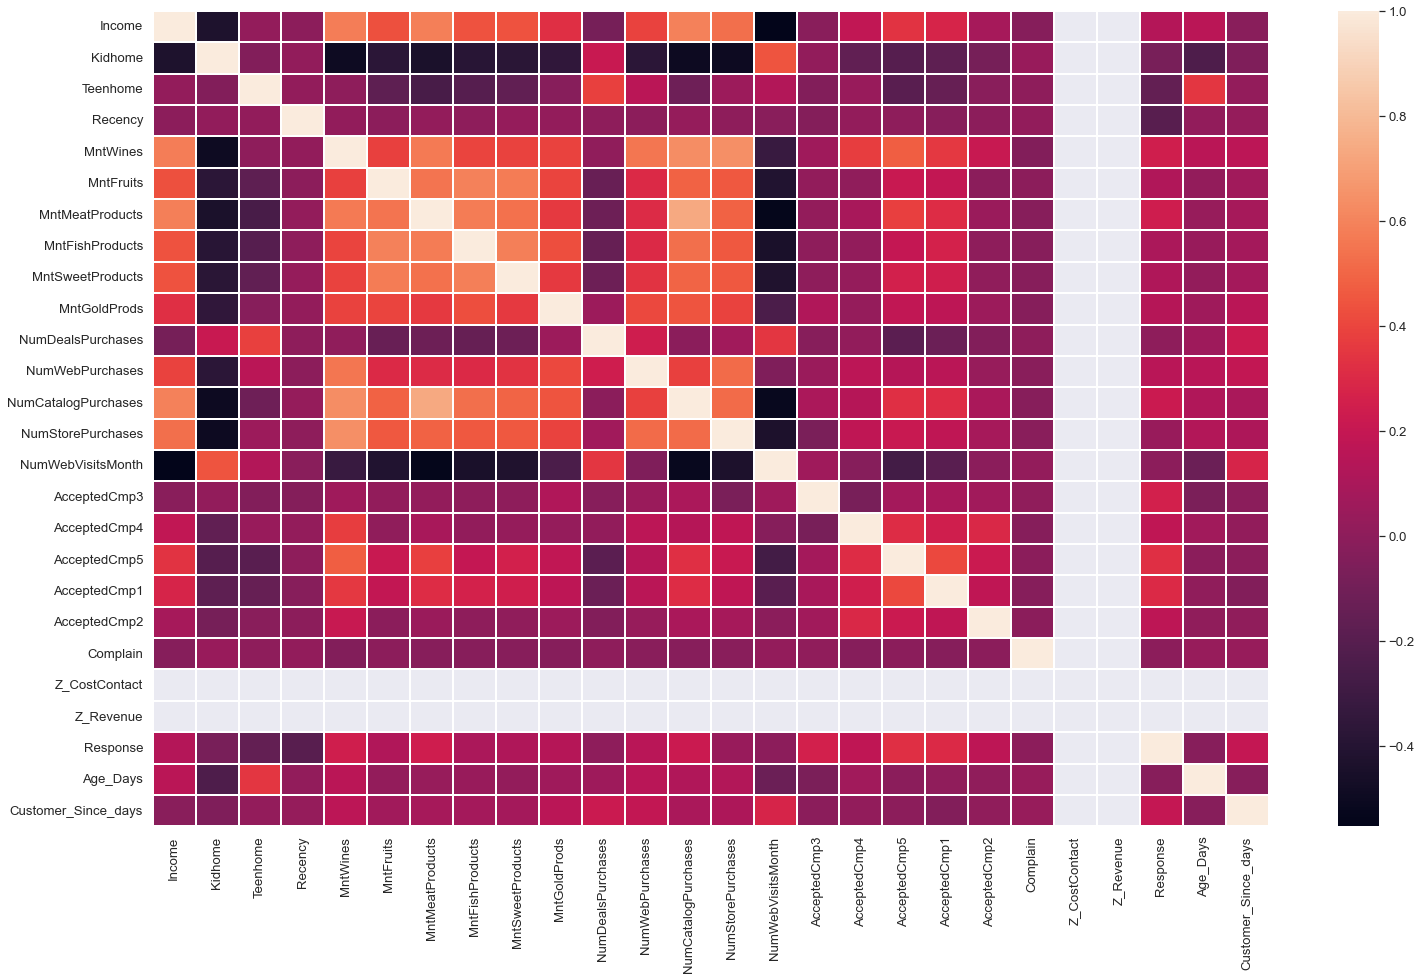

In [17]:
ml.heat_map(df)

**We can observe the correlated features in above heatmap. We can observe there are close to no correlated features in the dataset so apply Dimensionality Reduction would NOT be a good idea as we will lose a lot of information**

In [18]:
ml.anova_test(df, 'Response', 'Income')

ml.anova_test(df, 'Response', 'Recency')

f val: 9546.002783186716
p val: 0.0
f val: 6312.5500936830595
p val: 0.0


In [19]:
ml.normalcy_test(df, 'Response')

Output: 657.0683
15.0000: 0.5750, data not look normal (reject H0)
10.0000: 0.6550, data not look normal (reject H0)
5.0000: 0.7860, data not look normal (reject H0)
2.5000: 0.9160, data not look normal (reject H0)
1.0000: 1.0900, data not look normal (reject H0)


### Encoding

In [20]:
#Encoding the two categorical variables; Education and Marital_Status in the df
#We apply label encoding for this purpose

def apply_label_encoding(df, cols=[]):
    le = preprocessing.LabelEncoder()
    for i in cols:
        le.fit(df[i])
        df[i] = le.transform(df[i])
    return df

df = apply_label_encoding(df, cols=['Education','Marital_Status'])
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age_Days,Customer_Since_days
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,23742,3407
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,24838,2857
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,20820,3056
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,13881,2883
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,14976,2905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,3,11,0,20090,3125
2236,4,5,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,3,11,0,27760,2763
2237,2,2,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,3,11,0,14976,2899
2238,3,5,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,3,11,0,24108,2900


## Part 1 - Applying Classification ML Algorithms

**We try multiple ways to optimise accuracy with ML algorithms**

* a) Without Feature Selection, Cross Validation
* b) With Feature Selection (using RFFS)
* c) With Feature Selection and Cross Validation (using RFFS)
* d) With only Cross Validation

**Metrics are shown below in the code, we also draw a table of observations in the end for comparison**

**Splitting into train test 80/20**

In [21]:
#helper function which only splits into X and y
def XYsplit(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    return X,y

X,y = XYsplit(df, LABEL_COL)

In [22]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age_Days,Customer_Since_days
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,23742,3407
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,24838,2857
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,20820,3056
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,13881,2883
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,14976,2905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,3,11,20090,3125
2236,4,5,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,3,11,27760,2763
2237,2,2,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,3,11,14976,2899
2238,3,5,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,3,11,24108,2900


### Part 1a
**ML classification algos without FS or CV**

In [23]:
#We define validation metrics function taken from our template

# Validation metrics for classification
def validationmetrics(model, testX, testY, verbose=True):   
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    
    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
        
        ##### YAWAR KHALID PROPRIEOTARY CODE FOR ROC CURVE ####
        
        # plot the roc curve for the model
        plt.plot(fpr, tpr, linestyle='--', label='ROC Curve')
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()
    
    res_map = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score,
                "model_obj": model
              }
    return res_map

In [24]:
# Defining functions for Classification Algorithms

#We define functions for our algos, these have been taken from our template to provide clarity in this one single note book
#We use validationmetrics here


def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def KNN(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def GradientBoosting(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def AdaBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def DecisionTree(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def NaiveBayes(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GaussianNB()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def MultiLayerPerceptron(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = MLPClassifier(hidden_layer_sizes=5)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def LightGbm(trainX, testX, trainY, testY, verbose=True, clf=None):
    d_train = lgb.Dataset(trainX, label=trainY)
    params = {}
    params['learning_rate'] = 0.003
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'binary'
    params['metric'] = 'binary_logloss'
    params['sub_feature'] = 0.5
    params['num_leaves'] = 10
    params['min_data'] = 50
    params['max_depth'] = 10
    clf = lgb.train(params, d_train, 100)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [25]:
#defining a function to apply our classification ML Algos

def classification_ML(x, y, n= 0.2):
    
    trainX, testX, trainY, testY = train_test_split(x, y, test_size=n)
    
    c= str(input('Which Classifier?\n\n[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,\nRandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]\n'))
    
    
    if c =='LogReg':
        print('applying Logistic Regression Classification algorithm without FS, REG or CV....\n\n')
        LogReg(trainX, testX, trainY, testY)
        
    elif c =='KNN':
        print('applying KNN algorithm without FS, REG or CV....\n\n')
        KNN(trainX, testX, trainY, testY)
        
    elif c =='GradientBoosting':
        print('applying GradientBoosting algorithm without FS, REG or CV....\n\n')
        GradientBoosting(trainX, testX, trainY, testY)
        
    elif c =='AdaBoost':
        print('applying AdaBoost algorithm without FS, REG or CV....\n\n')
        AdaBoost(trainX, testX, trainY, testY)
        
    elif c =='SVM':
        print('applying SVM algorithm without FS, REG or CV....\n\n')
        SVM(trainX, testX, trainY, testY)
        
    elif c =='DecisionTree':
        print('applying DecisionTree algorithm without FS, REG or CV....\n\n')
        DecisionTree(trainX, testX, trainY, testY)
        
    elif c =='RandomForest':
        print('applying RandomForest algorithm without FS, REG or CV....\n\n')
        RandomForest(trainX, testX, trainY, testY)
        
    elif c =='NaiveBayes':
        print('applying NaiveBayes algorithm without FS, REG or CV....\n\n')
        NaiveBayes(trainX, testX, trainY, testY)
        
    elif c =='MultiLayerPerceptron':
        print('applying MultiLayerPerceptron algorithm without FS, REG or CV....\n\n')
        MultiLayerPerceptron(trainX, testX, trainY, testY)
        
    elif c =='XgBoost':
        print('applying XgBoost algorithm without FS, REG or CV....\n\n')
        XgBoost(trainX, testX, trainY, testY)
        
    elif c =='LightGbm':
        print('applying LightGbm algorithm without FS, REG or CV....\n\n')
        LightGbm(trainX, testX, trainY, testY)
        
    else:
        print('\ninvalid classification algo entered ... check exact match from list')



Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
LogReg
applying Logistic Regression Classification algorithm without FS, REG or CV....


Prediction Vector: 
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

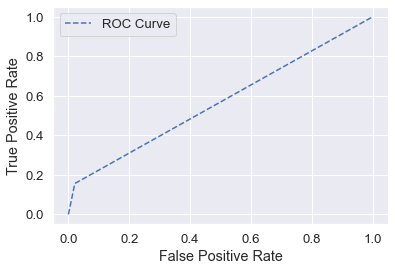

In [27]:
#Classification Algo LogReg

res_ML_LogReg = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
KNN
applying KNN algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0

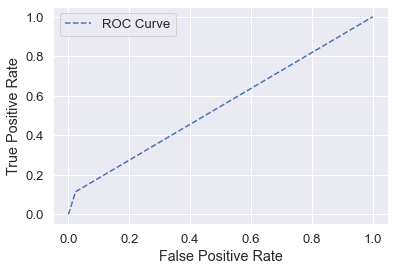

In [28]:
res_ML_KNN = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
GradientBoosting
applying GradientBoosting algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0

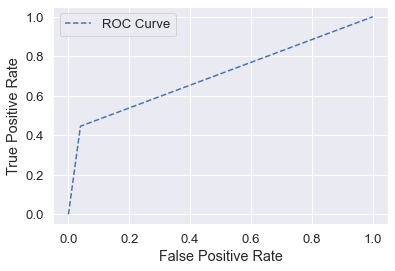

In [29]:
res_ML_GradientBoosting = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
AdaBoost
applying AdaBoost algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0

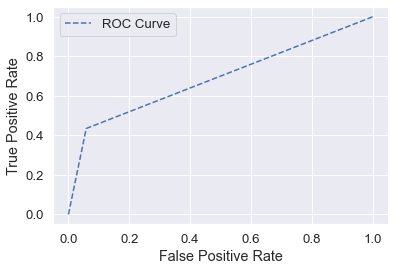

In [30]:
res_ML_AdaBoost = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
SVM
applying SVM algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

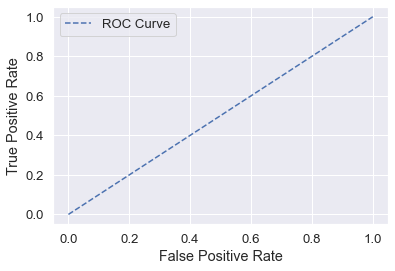

In [31]:
res_ML_SVM = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
DecisionTree
applying DecisionTree algorithm without FS, REG or CV....


Prediction Vector: 
 [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 1 1 0

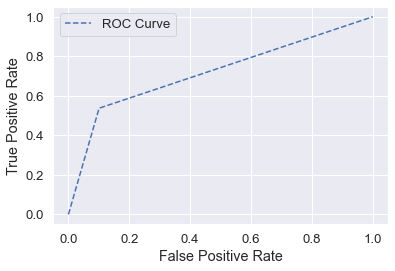

In [32]:
res_ML_DecisionTree = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
RandomForest
applying RandomForest algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

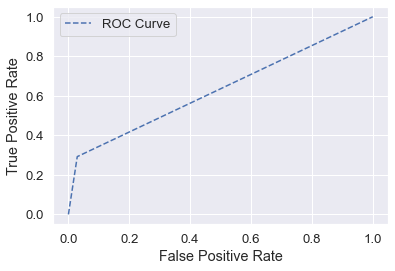

In [33]:
res_ML_RandomForest = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
NaiveBayes
applying NaiveBayes algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0

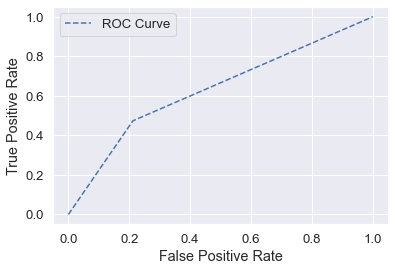

In [34]:
res_ML_NaiveBayes = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
MultiLayerPerceptron
applying MultiLayerPerceptron algorithm without FS, REG or CV....


Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

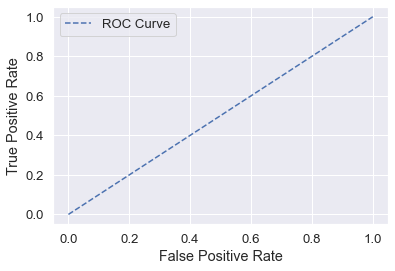

In [35]:
res_ML_MultiLayerPerceptron = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
XgBoost
applying XgBoost algorithm without FS, REG or CV....


[18:06:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

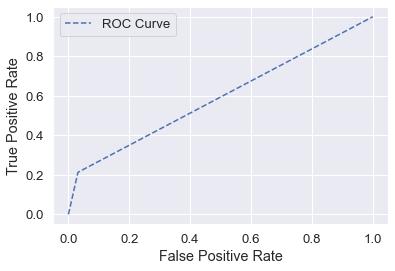

In [36]:
res_ML_XgBoost = classification_ML(X,y)

Which Classifier?

[LogReg, KNN, GradientBoosting, AdaBoost, SVM, DecisionTree,
RandomForest,NaiveBayes, MultiLayerPerceptron, XgBoost, LightGbm]
LightGbm
applying LightGbm algorithm without FS, REG or CV....


[LightGBM] [Info] Number of positive: 262, number of negative: 1510
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 1772, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147856 -> initscore=-1.751520
[LightGBM] [Info] Start training from score -1.751520
Prediction Vector: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

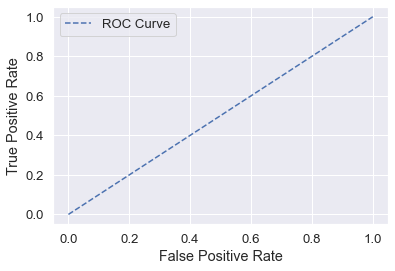

In [37]:
res_ML_LightGbm  = classification_ML(X,y)

### Part 1B
**ML algos with feature selection using RFFS, MIFS and REFS**


In [38]:
#HELPER FUNCTIONS (Taken from my template)

# Helper function to provide list of supported algorithms for Classification
def get_supported_algorithms():
    covered_algorithms = [LogReg, KNN, GradientBoosting, AdaBoost,
                          SVM, DecisionTree, RandomForest, NaiveBayes,
                          MultiLayerPerceptron]
    if XGBClassifier:
        covered_algorithms.append(XgBoost)
    if lgb:
        covered_algorithms.append(LightGbm)
    return covered_algorithms

# Helper function to select important features via RFFS, run supported ML algorithms over dataset with manual split and measure accuracy without Cross Validation - select features with importance >=threshold
def MachineLearningwithRFFS(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col=label_col)
    res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY, trees=10, regression=regression)
    
    impftrs = list(res[res > threshold].keys())
    #impftrs.append(label_col)
    
    print ("Selected Features =" + str(impftrs))
    print(df.shape)
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}


#Train Test Split: splitting manually
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    return X, trainX, testX, trainY, testY

# Helper function to get fetaure importance metrics via Random Forest Feature Selection (RFFS)
def RFfeatureimportance(df, trainX, testX, trainY, testY, trees=35, random=None, regression=False):
    if regression:
        clf  = RandomForestRegressor(n_estimators=trees, random_state=random)
    else:
        clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX,trainY)
    #validationmetrics(clf,testX,testY)
    res = pd.Series(clf.feature_importances_, index=df.columns.values).sort_values(ascending=False)*100
    print(res)
    return res

# Helper function to run all algorithms provided in algo_list over given dataframe, without cross validation
# By default it will run all supported algorithms 
def run_algorithms(df, label_col, algo_list=get_supported_algorithms(), feature_list=[]):
    """
    Run Algorithms with manual split
    
    """
    # Lets make a copy of dataframe and work on that to be on safe side 
    _df = df.copy()
    
    if feature_list:
        impftrs = feature_list
        impftrs.append(label_col)
        _df = _df[impftrs]
    
    _df, trainX, testX, trainY, testY = traintestsplit(_df, 0.2, 91, label_col=label_col)
    algo_model_map = {}
    for algo in algo_list:
        print("============ " + algo.__name__ + " ===========")
        res = algo(trainX, testX, trainY, testY)
        algo_model_map[algo.__name__] = res.get("model_obj", None)
        print ("============================== \n")
    
    return algo_model_map

# Helper function to select important features via MIFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
def MachineLearningwithMIFS(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    res = mutualinformation(df_cpy, label_col=label_col, regression=regression)
    
    #include all selected features in impftrs
    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}

# ## Mutual Information Feature Selection (MIFS) 
# MachineLearningwithMIFS() => Helper function to select important features and run supported ML algorithms over dataset

# mutualinformation()  => Helper function to get fetaure importance metrics via Mutual Information Classifier/Regressor.
def mutualinformation(df, label_col, regression=False):
    df_cpy = df.copy()
    y = df_cpy[label_col].copy()
    X = df_cpy.drop(label_col,axis=1)
    if regression:
        mutual_info = mutual_info_regression(X,y,random_state=35)
    else:
        mutual_info = mutual_info_classif(X,y,random_state=35)
    results = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)*100
    print(results)
    return results

# Helper function to select important features via REFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
# flexible enough to use any algorithm for recursive feature elimination and any alogorithm to run on selected features
def GenericREFS(df, label_col,
                algo_list=get_supported_algorithms(),
                re_algo=RandomForestClassifier,
                **kwargs):
    
    X,y = XYsplit(df, label_col)
    clf = re_algo(**kwargs)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    feature_list = X.columns[selector.support_].tolist()
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=feature_list)
    return {"selected_features": feature_list, "results": results}



In [39]:
## Defining function for ML Algos with RFFS (Again, taken from my template)

def classification_ML_FS(df,col,threshold=5,algo_list=get_supported_algorithms(), regression=False, re_algo=RandomForestClassifier,**kwargs):
      
    FS= str(input('Which FS Algo?\n\n[RFFS, MIFS, REFS]\n'))
    
    
    if FS =='RFFS':
        print('applying FS with RFFS and then applying all ML algos....\n\n')
        MachineLearningwithRFFS(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())
   
    elif FS =='MIFS':
        print('applying FS with MIFS and then applying all ML algos....\n\n')
        MachineLearningwithMIFS(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())

    elif FS =='REFS':
            print('applying FS with REFS and then applying all ML algos....\n\n')
            GenericREFS(df, col, algo_list=get_supported_algorithms(), re_algo=RandomForestClassifier,**kwargs)
             
    else:
        print('\ninvalid FS algo entered ... check exact match from list')



Which FS Algo?

[RFFS, MIFS, REFS]
RFFS
applying FS with RFFS and then applying all ML algos....


Customer_Since_days    9.286357
Recency                8.215635
MntWines               7.505673
MntMeatProducts        6.526199
Income                 6.383664
Age_Days               5.486679
MntFruits              4.937288
AcceptedCmp1           4.665576
AcceptedCmp3           4.625285
MntGoldProds           4.532929
NumCatalogPurchases    4.260716
NumStorePurchases      4.212608
MntFishProducts        4.177046
NumWebVisitsMonth      3.712370
AcceptedCmp5           3.440381
MntSweetProducts       3.331183
NumWebPurchases        3.210600
Marital_Status         3.201566
Education              2.683297
NumDealsPurchases      1.860357
Teenhome               1.461704
AcceptedCmp4           1.177076
AcceptedCmp2           0.596670
Kidhome                0.442002
Complain               0.067138
Z_CostContact          0.000000
Z_Revenue              0.000000
dtype: float64
Selected Features =['C

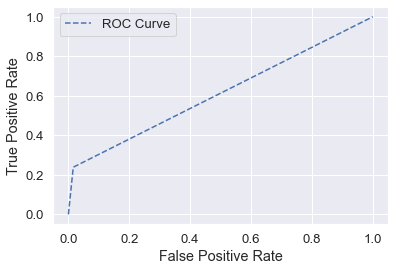


============ KNN ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]

 Accuracy: 
 84.90990990990991

 Precision of e

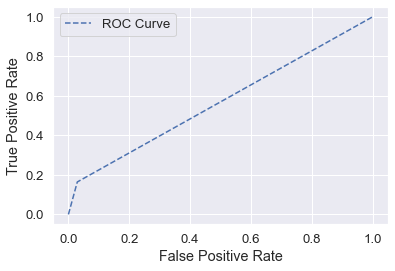


============ GradientBoosting ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

 Accuracy: 
 86.93693693693693

 P

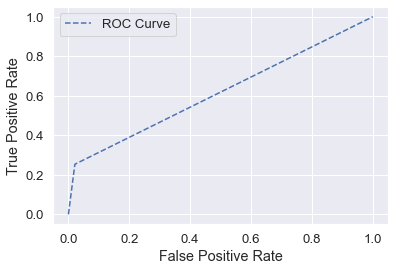


============ AdaBoost ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

 Accuracy: 
 86.48648648648648

 Precision

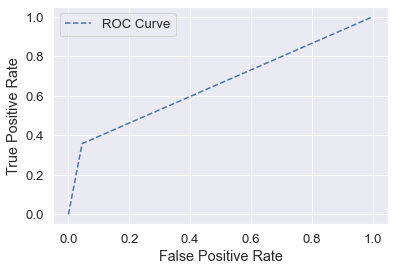


============ SVM ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 Accuracy: 
 84.90990990990991

 Precision of e

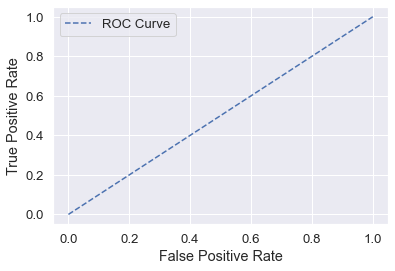


============ DecisionTree ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]

 Accuracy: 
 80.4054054054054

 Precis

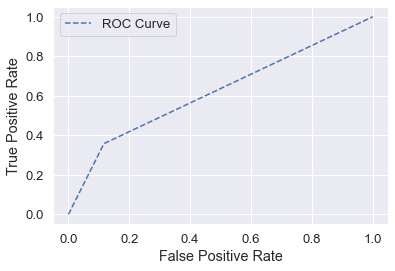


============ RandomForest ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

 Accuracy: 
 86.48648648648648

 Preci

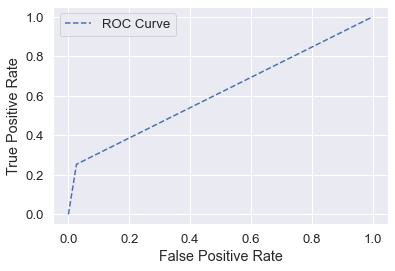


============ NaiveBayes ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]

 Accuracy: 
 85.58558558558559

 Precisi

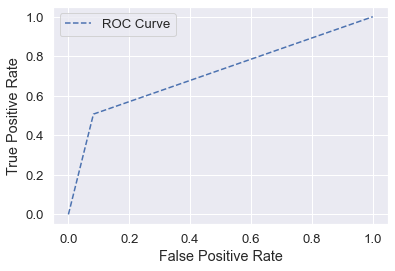


============ MultiLayerPerceptron ===========
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0]

 Accuracy: 
 70.4954954954955


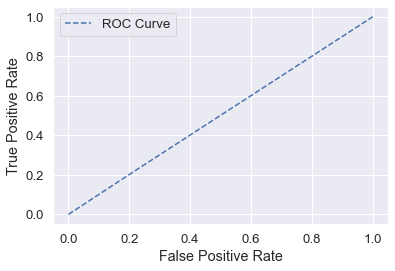


============ XgBoost ===========
[18:07:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

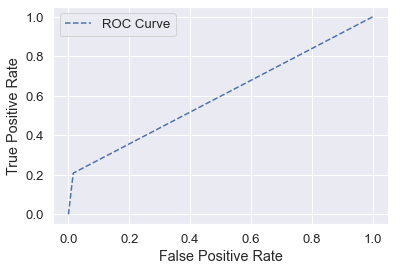


============ LightGbm ===========
[LightGBM] [Info] Number of positive: 266, number of negative: 1506
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 1772, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150113 -> initscore=-1.733716
[LightGBM] [Info] Start training from score -1.733716
Prediction Vector: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0

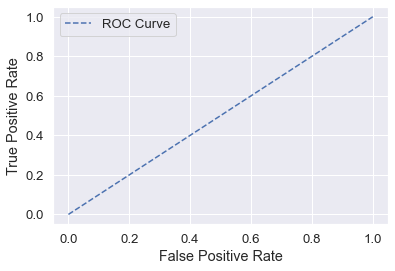

In [40]:
res_ML_RFFS = classification_ML_FS(df,LABEL_COL, threshold=3, algo_list= get_supported_algorithms(),re_algo=RandomForestClassifier)

## Part 1C
**Applying ML algos with FS and Cross Validation both**

In [41]:
#HELPER FUNCTIONS


def MachineLearningwithRFFS_CV(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col=label_col)
    res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY,
                              trees=10, regression=regression)

    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    print(df.shape)
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=impftrs, cross_valid_method=cross_valid_method)
    return {"selected_features": impftrs, "results": results}

def cross_valid_stratified_kf(X, y, split=10, random=None, shuffle=False):
    """
    Generator function for Stratified KFold cross validation
    
    """
    skf = StratifiedKFold(n_splits=split, random_state=random, shuffle=shuffle)
    for train_index, test_index in skf.split(X, y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        yield trainX,trainY,testX,testY
        
# With stratified kfold validation support
def run_algorithms_cv(df, label_col, algo_list=get_supported_algorithms(), feature_list=[], cross_valid_method=cross_valid_stratified_kf):
    """
    Run Algorithms with cross validation
    
    """
    _df = df.copy()
    X,y = XYsplit(_df, label_col)
    
    # Select features if specified by driver program
    if feature_list:
        X = X[feature_list]
    
    result = {}
    algo_model_map = {}
    for algo in algo_list:
        clf = None
        result[algo.__name__] = dict()
        for trainX,trainY,testX,testY  in cross_valid_method(X, y, split=10):
            res_algo = algo(trainX, testX, trainY, testY, verbose=False, clf=clf)
            # Get trained model so we could use it again in the next iteration
            clf = res_algo.get("model_obj", None)
            
            for k,v in res_algo.items():
                if k == "model_obj":
                    continue
                if k not in result[algo.__name__].keys():
                    result[algo.__name__][k] = list()
                result[algo.__name__][k].append(v)
                
        algo_model_map[algo.__name__] = clf
            
    score_map = dict()
    # let take average scores for all folds now
    for algo, metrics in result.items():
        print("============ " + algo + " ===========")
        score_map[algo] = dict()
        for metric_name, score_lst in metrics.items():
            score_map[algo][metric_name] = np.mean(score_lst)
        print(score_map[algo])
        print ("============================== \n")
        score_map[algo]["model_obj"] = algo_model_map[algo]
    
    return score_map


# Helper function to select important features via MIFS, run supported ML algorithms over dataset with manual split and measure accuracy, with CV ... select features with importance >=threshold
def MachineLearningwithMIFS_CV(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    res = mutualinformation(df_cpy, label_col=label_col, regression=regression)
    
    #include all selected features in impftrs
    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=impftrs, cross_valid_method=cross_valid_method)
    return {"selected_features": impftrs, "results": results}

# Helper function to select important features via REFS, run supported ML algorithms over dataset with manual split and measure accuracy, with CV ... select features with importance >=threshold
# flexible enough to use any algorithm for recursive feature elimination and any alogorithm to run on selected features
def GenericREFS_CV(df, label_col,
                algo_list=get_supported_algorithms(),
                regression=False,
                re_algo=RandomForestClassifier,
                **kwargs):
    
    X,y = XYsplit(df, label_col)
    clf = re_algo(**kwargs)
    selector = RFECV(estimator=clf, step=1, cv=10)
    selector = selector.fit(X,y)
    feature_list = X.columns[selector.support_].tolist()
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=feature_list, cross_valid_method=cross_valid_method)
    return {"selected_features": feature_list, "results": results}

In [42]:
#Executing all ML functions with FS and CV. (Without regularization) -- (TAKEN FROM MY TEMPLATE)

def classification_ML_FS_CV(df,col,threshold=5,algo_list=get_supported_algorithms(), regression=False, re_algo=RandomForestClassifier,**kwargs):
      
    FS_CV= str(input('Which FS Algo?\n\n[RFFS_CV, MIFS_CV, REFS_CV]\n'))
    
    
    if FS_CV =='RFFS_CV':
        print('applying FS with RFFS and then running ML algos with CV....\n\n')
        MachineLearningwithRFFS_CV(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())
   
    elif FS_CV =='MIFS_CV':
        print('applying FS with MIFS and then running all ML algos with CV....\n\n')
        MachineLearningwithMIFS_CV(df, col , threshold=5,
                                    algo_list=get_supported_algorithms())

    elif FS_CV =='REFS_CV':
            print('applying FS with REFS and then running all ML algos with CV....\n\n')
            GenericREFS_CV(df, col, algo_list=get_supported_algorithms(), re_algo=RandomForestClassifier,**kwargs)
             
    else:
        print('\ninvalid FS algo entered ... check exact match from list')



In [43]:
res_ML_RFFS_CV = classification_ML_FS_CV(df,LABEL_COL, threshold=3, algo_list=get_supported_algorithms(),re_algo= RandomForestClassifier)

Which FS Algo?

[RFFS_CV, MIFS_CV, REFS_CV]
RFFS_CV
applying FS with RFFS and then running ML algos with CV....


Customer_Since_days    9.083910
Recency                8.749168
Income                 8.599045
MntWines               7.216068
MntMeatProducts        6.556196
MntGoldProds           5.014645
Age_Days               4.923684
AcceptedCmp1           4.848805
NumStorePurchases      4.647213
MntSweetProducts       4.360334
MntFishProducts        4.274802
NumWebVisitsMonth      4.226312
AcceptedCmp3           4.012500
NumDealsPurchases      3.701278
MntFruits              3.449946
NumWebPurchases        2.990941
Education              2.813723
NumCatalogPurchases    2.797012
Marital_Status         2.256063
AcceptedCmp5           2.198762
AcceptedCmp4           1.011566
Teenhome               0.963470
AcceptedCmp2           0.940920
Kidhome                0.291943
Complain               0.071695
Z_CostContact          0.000000
Z_Revenue              0.000000
dtype: float64
Selecte

### Part 1D 
**Applying ML algos with Cross Validation only**

In [44]:
def classification_ML_CV(df, label_col, algo_list=get_supported_algorithms(), feature_list=[], cross_valid_method=cross_valid_stratified_kf):
    """
    Run Algorithms with cross validation
    
    """
    _df = df.copy()
    X,y = XYsplit(_df, label_col)
    
    # Select features if specified by driver program
    if feature_list:
        X = X[feature_list]
    
    result = {}
    algo_model_map = {}
    for algo in algo_list:
        clf = None
        result[algo.__name__] = dict()
        for trainX,trainY,testX,testY  in cross_valid_method(X, y, split=10):
            res_algo = algo(trainX, testX, trainY, testY, verbose=False, clf=clf)
            # Get trained model so we could use it again in the next iteration
            clf = res_algo.get("model_obj", None)
            
            for k,v in res_algo.items():
                if k == "model_obj":
                    continue
                if k not in result[algo.__name__].keys():
                    result[algo.__name__][k] = list()
                result[algo.__name__][k].append(v)
                
        algo_model_map[algo.__name__] = clf
            
    score_map = dict()
    # let take average scores for all folds now
    for algo, metrics in result.items():
        print("============ " + algo + " ===========")
        score_map[algo] = dict()
        for metric_name, score_lst in metrics.items():
            score_map[algo][metric_name] = np.mean(score_lst)
        print(score_map[algo])
        print ("============================== \n")
        score_map[algo]["model_obj"] = algo_model_map[algo]
    
    return score_map

In [45]:
res_ML_CV = classification_ML_CV(df,LABEL_COL)

[18:07:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1635105055642/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:28] WARNING: /Users/runner/miniforge3/cond

## Evaluation of ML Algos

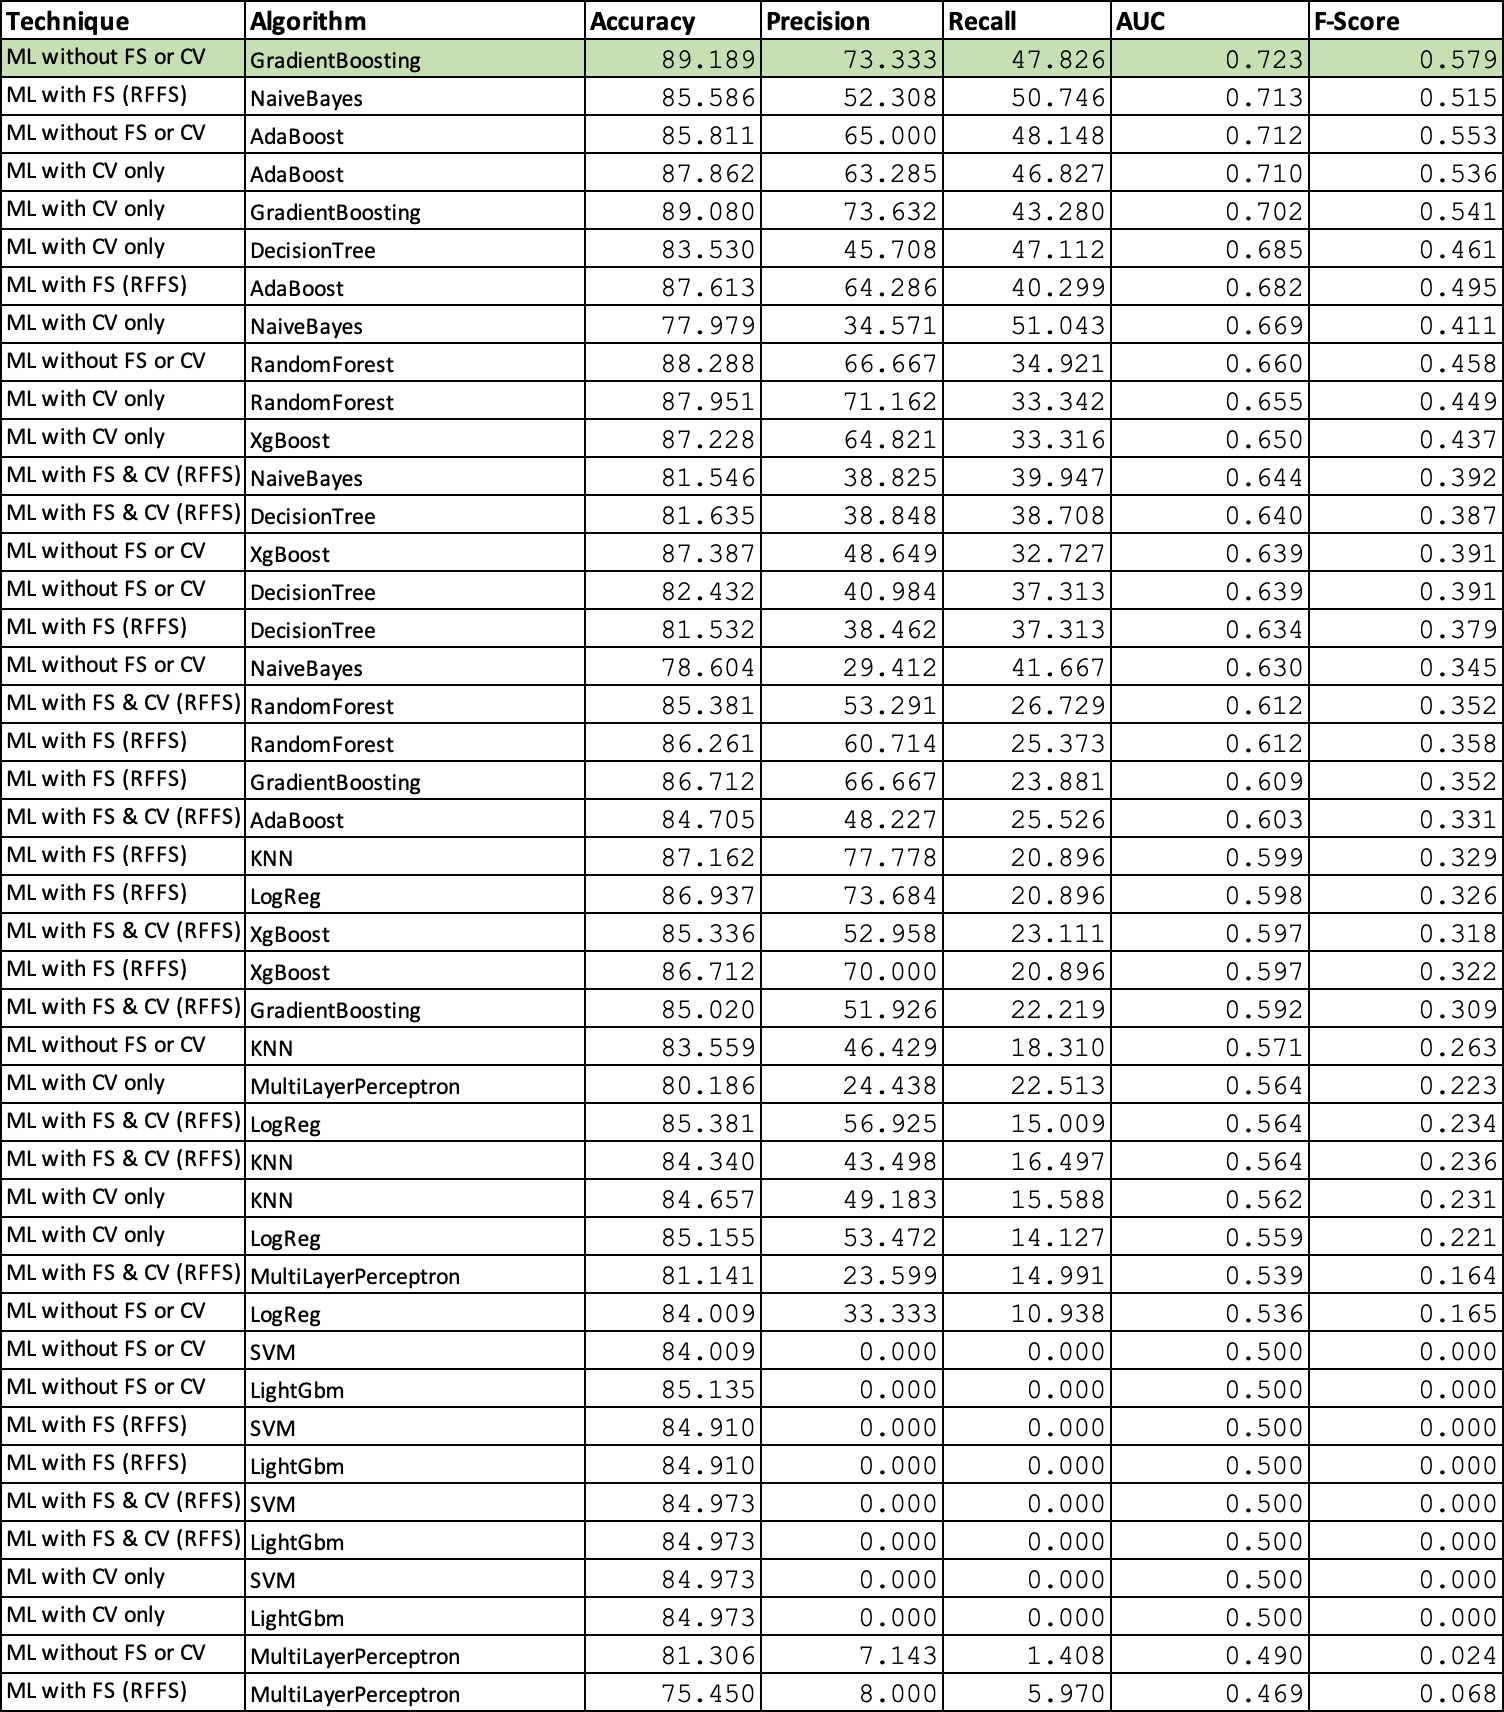

**We can observe that Gradient Boosting without any feature selection or cross validation gives the best results with an AUC of 0.723, F-Score of 0.579 and an accuracy of 89.189%**

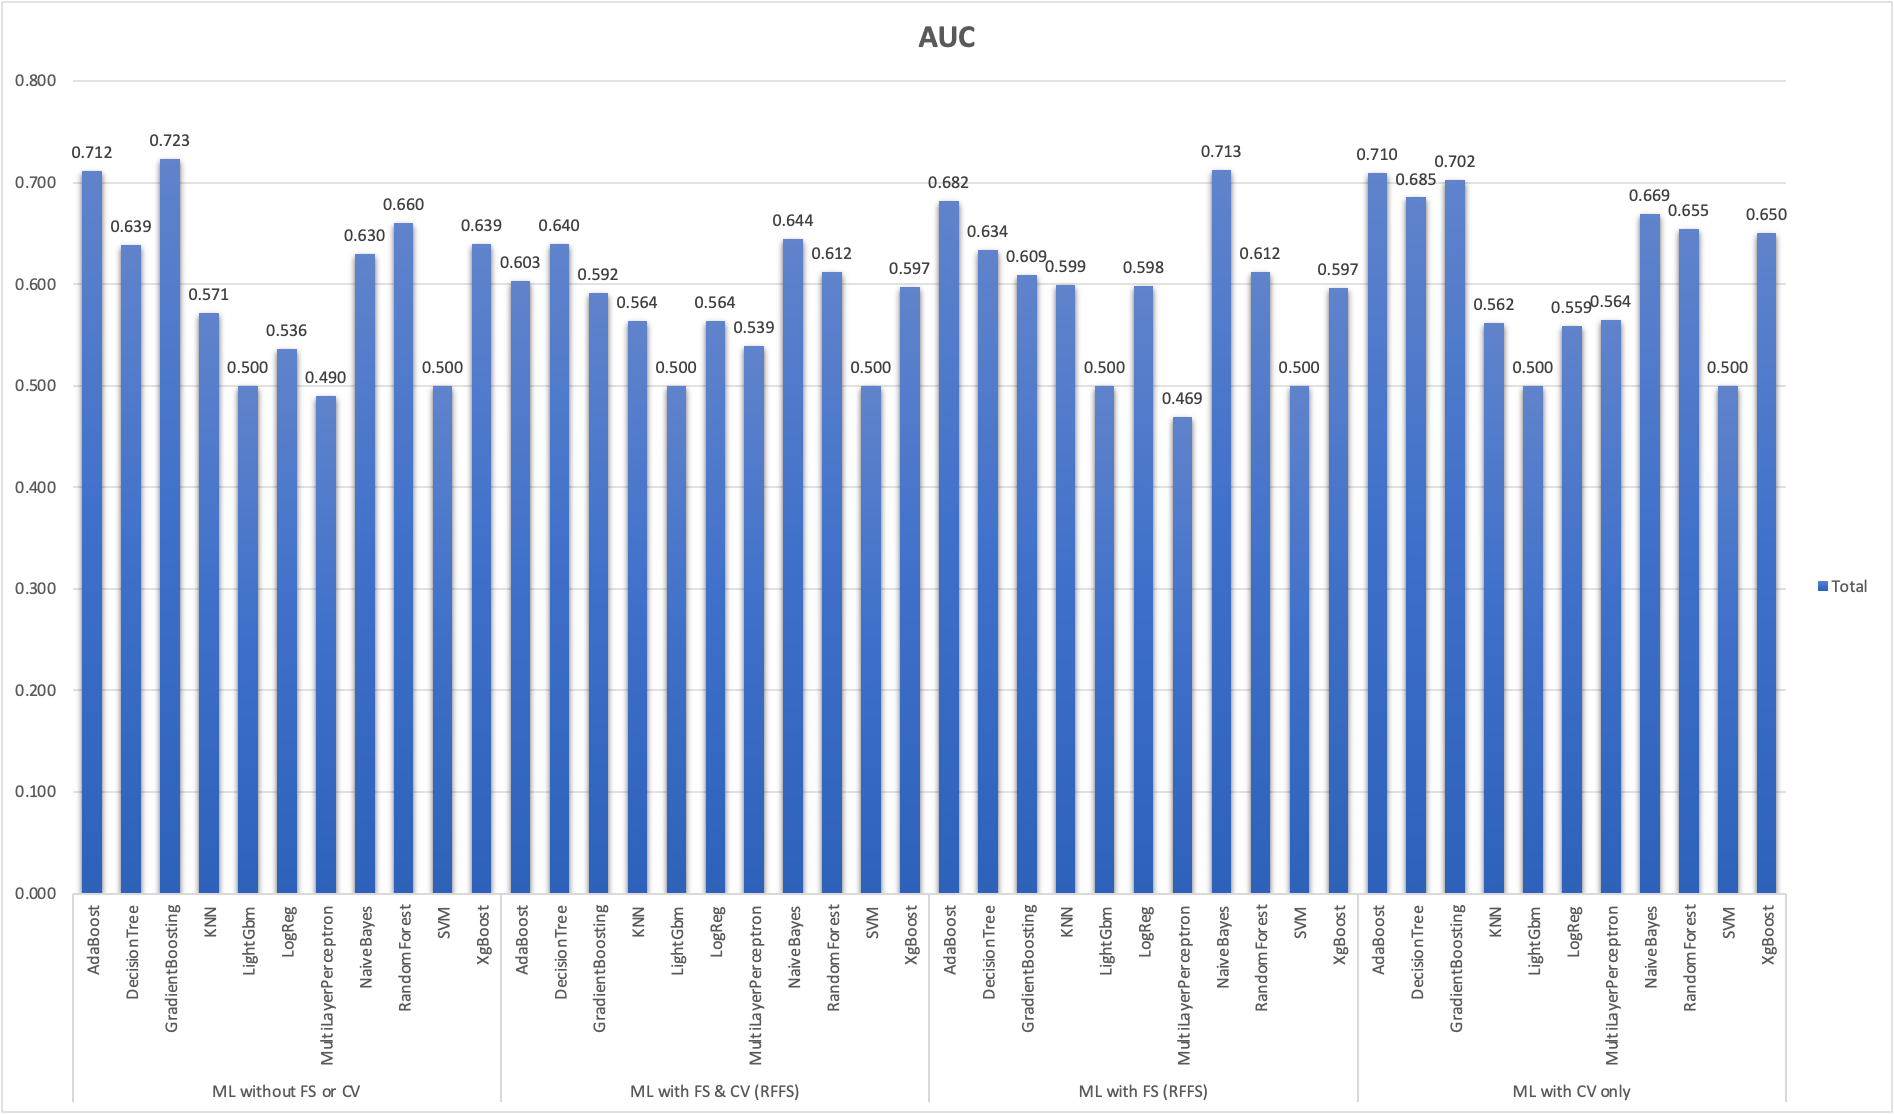

# Part 2: Markov Chain Monte Carlo

*Since Pymc3 doesn't work on my machine, this part was performed on colab**

In [58]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from pathlib import Path
import pickle
from collections import OrderedDict
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
                             precision_recall_curve) 
from mlxtend.plotting import plot_confusion_matrix

import theano
import pymc3 as pm
from pymc3.variational.callbacks import CheckParametersConvergence
import statsmodels.formula.api as smf

import arviz as az
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from IPython.display import HTML

**Models**

In [59]:
data = df

data_path = Path('data')
fig_path = Path('figures')
model_path = Path('models')
for p in [data_path, fig_path, model_path]:
    if not p.exists():
        p.mkdir()

In [60]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age_Days',
       'Customer_Since_days'],
      dtype='object')

In [61]:
simple_model = 'Response ~ Income + Recency + Age_Days'
full_model = 'Response ~ Income + Recency + Age_Days + Customer_Since_days + Complain +  Education + Marital_Status + Kidhome +  Teenhome + NumStorePurchases'

**MAP Inference**

A probabilistic program consists of observed and unobserved random variables. We define the observed RVs via likelihood distributions and unobserved RVs via prior distributions. PyMC3 includes numerous probability distributions for this purpose.

Logistic regression models the probability that individual i subscribes to a deposit based on  k features.

**Manual Model Specification**

We will use the context manager with to define a manual_logistic_model that we can refer to later as a probabilistic model:

* The random variables for the unobserved parameters for intercept and features are expressed using uninformative priors that assume normal distributions with mean  0 and standard deviation of  100.

* The likelihood combines the parameters with the data according to the specification of the logistic regression.

* The outcome is modeled as a Bernoulli RV with success probability given by the likelihood.

In [62]:
with pm.Model() as manual_logistic_model:
    # random variables for coefficients with
    # uninformative priors for each parameter

    intercept = pm.Normal('intercept', 0, sd=100)
    beta_1 = pm.Normal('beta_1', 0, sd=100)
    beta_2 = pm.Normal('beta_2', 0, sd=100)
    beta_3 = pm.Normal('beta_3', 0, sd=100)

    # Transform random variables into vector of probabilities p(y_i=1)
    # according to logistic regression model specification.
    likelihood = pm.invlogit(intercept + beta_1 * data.Income + beta_2 * data.Recency + beta_3 * data.Complain)

    # Bernoulli random vector with probability of success
    # given by sigmoid function and actual data as observed
    pm.Bernoulli(name='logit', p=likelihood, observed=data.Response)

In [63]:
manual_logistic_model.model

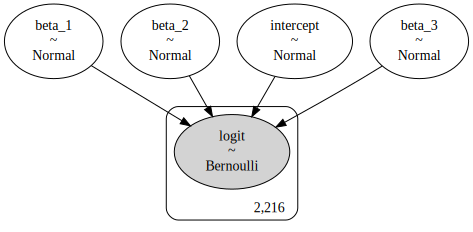

In [64]:
pm.model_to_graphviz(manual_logistic_model)


**MAP Estimate**

MAP estimation leverages that the evidence is a constant factor that scales the posterior to meet the requirements for a probability distribution. Since the evidence does not depend on θ

We obtain point MAP estimates for the three parameters using the just defined model’s .find_MAP() method:

In [65]:
with manual_logistic_model:
    # compute maximum a-posteriori estimate
    # for logistic regression weights
    manual_map_estimate = pm.find_MAP()

In [66]:
def print_map(result):
    return pd.Series({k: np.asscalar(v) for k, v in result.items()})

In [67]:
print_map(manual_map_estimate)

intercept   -0.000388
beta_1      -0.000004
beta_2      -0.032165
beta_3      -0.000006
dtype: float64

**GLM Model**

PyMC3 includes numerous common models so that we can usually leave the manual specification for custom applications.
The following code defines the same logistic regression as a member of the Generalized Linear Models (GLM) family.

In [68]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(simple_model,
                            data,
                            family=pm.glm.families.Binomial())

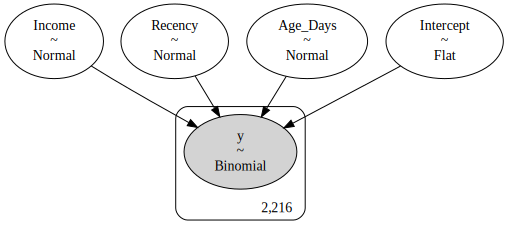

In [69]:
pm.model_to_graphviz(logistic_model)

PyMC3 solves the optimization problem of finding the posterior point with the highest density BFGS algorithm but offers several alternatives provided by the scipy library. The result is virtually identically to the corresponding statsmodels estimate.

In [71]:
model = smf.logit(formula=simple_model, data=data[['Response', 'Income', 'Recency', 'Age_Days']])
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392906
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 2216
Model:                          Logit   Df Residuals:                     2212
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Jan 2022   Pseudo R-squ.:                 0.07154
Time:                        15:54:22   Log-Likelihood:                -870.68
converged:                       True   LL-Null:                       -937.76
Covariance Type:            nonrobust   LLR p-value:                 6.835e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2539      0.312     -4.019      0.000      -1.865      -0.642
Income      1.765e-05   2.84e

In [72]:
print_map(manual_map_estimate)

intercept   -0.000388
beta_1      -0.000004
beta_2      -0.032165
beta_3      -0.000006
dtype: float64

In [73]:
result.params

Intercept   -1.253863
Income       0.000018
Recency     -0.020770
Age_Days    -0.000028
dtype: float64

### Markov Chain Monte Carlo

Markov chains are stochastic models that describe sequences of possible events. Each event comes from a set of outcomes, and each outcome determines which outcome occurs next, according to a fixed set of probabilities. An important feature of Markov chains is that they are memoryless: everything that you would possibly need to predict the next event is available in the current state, and no new information comes from knowing historical events.
Monte Carlo methods rely on repeated random sampling to approximate results that may be deterministic, but that does not permit an analytic, exact solution.
Many algorithms apply the Monte Carlo method to a Markov Chain, and generally proceed as follows:

- Start at the current position.
- Draw a new position from a proposal distribution.
- Evaluate the probability of the new position in light of data and prior distributions:
- If sufficiently likely, move to the new position
- Otherwise, remain at the current position
- Repeat from step 1.
- After a given number of iterations, return all accepted positions.

In [74]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(formula=full_model,
                            data=data,
                            family=pm.glm.families.Binomial())

In [75]:
logistic_model.basic_RVs

[Intercept ~ Flat,
 Income ~ Normal,
 Recency ~ Normal,
 Age_Days ~ Normal,
 Customer_Since_days ~ Normal,
 Complain ~ Normal,
 Education ~ Normal,
 Marital_Status ~ Normal,
 Kidhome ~ Normal,
 Teenhome ~ Normal,
 NumStorePurchases ~ Normal,
 y ~ Binomial]

**Hamiltonian Monte Carlo – going NUTS**

By default, PyMC3 automatically selects the most efficient sampler and initializes the sampling process for efficient convergence. For a continuous model, PyMC3 chooses the NUTS sampler. It also runs variational inference via ADVI to find good starting parameters for the sampler.

Hamiltonian Monte Carlo (HMC) is a hybrid method that leverages the first-order derivative information of the gradient of the likelihood to propose new states for exploration and overcome some of the challenges of MCMC. In addition, it incorporates momentum to efficiently jump around the posterior. As a result, it converges faster to a high-dimensional target distribution than simpler random-walk Metropolis or Gibbs sampling.

**To see what the convergence looks like, we first draw  1,000 samples after tuning the sampler for 1,000 iterations that will be discarded. The sampling process can be parallelized for multiple chains using the cores argument.**

In [76]:
with logistic_model:
    trace = pm.sample(tune=1000,
                         draws=1000,
                         chains=4,
                         init = 'adapt_diag',
                         cores=3)

**Inspect Trace**

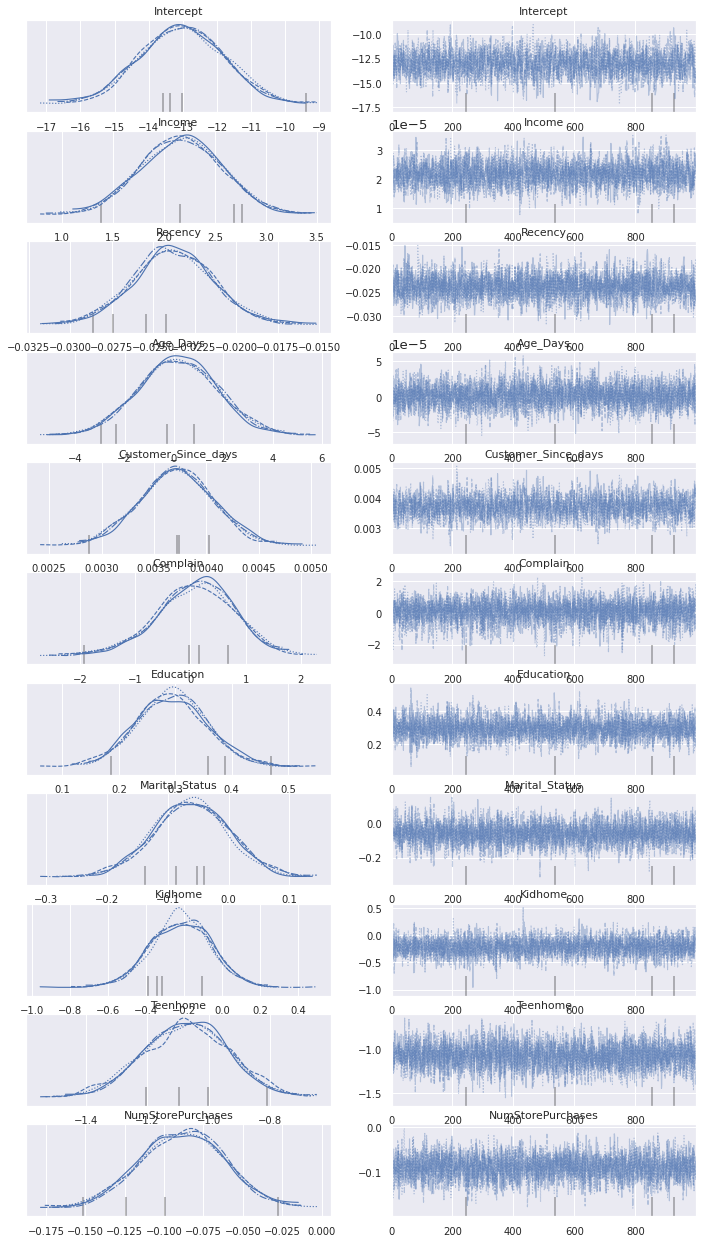

In [77]:
pm.plot_trace(trace);

In [78]:
with open(model_path / 'logistic_model_mh.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model, 'trace': trace}, buff)

PyMC3 produces various summary statistics for a sampler. These are available as individual functions in the stats module, or by providing a trace to the pm.summary() function shown below.

In [79]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-13.039,1.221,-15.247,-10.718,0.030,0.022,1657.0,2025.0,1.0
Income,0.000,0.000,0.000,0.000,0.000,0.000,2497.0,2377.0,1.0
Recency,-0.024,0.002,-0.029,-0.019,0.000,0.000,3641.0,2367.0,1.0
Age_Days,0.000,0.000,-0.000,0.000,0.000,0.000,3468.0,2481.0,1.0
Customer_Since_days,0.004,0.000,0.003,0.004,0.000,0.000,1846.0,2037.0,1.0
Complain,0.080,0.709,-1.276,1.375,0.011,0.013,4516.0,2728.0,1.0
Education,0.295,0.062,0.180,0.408,0.001,0.001,3483.0,2390.0,1.0
Marital_Status,-0.062,0.061,-0.176,0.053,0.001,0.001,3987.0,2897.0,1.0
Kidhome,-0.217,0.157,-0.498,0.088,0.003,0.002,3542.0,2431.0,1.0
Teenhome,-1.074,0.138,-1.324,-0.807,0.002,0.002,3538.0,2831.0,1.0


In [80]:
draws = 100

trace_df = pm.trace_to_dataframe(trace).assign(
    chain=lambda x: x.index // draws)

trace_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Intercept            4000 non-null   float64
 1   Income               4000 non-null   float64
 2   Recency              4000 non-null   float64
 3   Age_Days             4000 non-null   float64
 4   Customer_Since_days  4000 non-null   float64
 5   Complain             4000 non-null   float64
 6   Education            4000 non-null   float64
 7   Marital_Status       4000 non-null   float64
 8   Kidhome              4000 non-null   float64
 9   Teenhome             4000 non-null   float64
 10  NumStorePurchases    4000 non-null   float64
 11  chain                4000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 375.1 KB


**Persist Results**

In [81]:
with open(model_path / 'logistic_model_nuts.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model,
                 'trace': trace}, buff)

In [82]:
with open(model_path / 'logistic_model_nuts.pkl', 'rb') as buff:
    data0 = pickle.load(buff)  

logistic_model, trace_NUTS = data0['model'], data0['trace']

**Combine Traces**

In [83]:
draws = 10000

df = pm.trace_to_dataframe(trace_NUTS).iloc[200:].reset_index(
    drop=True).assign(chain=lambda x: x.index // draws)

trace_df = pd.concat([trace_df.assign(samples=100),
                      df.assign(samples=10000)])
trace_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7800 entries, 0 to 3799
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Intercept            7800 non-null   float64
 1   Income               7800 non-null   float64
 2   Recency              7800 non-null   float64
 3   Age_Days             7800 non-null   float64
 4   Customer_Since_days  7800 non-null   float64
 5   Complain             7800 non-null   float64
 6   Education            7800 non-null   float64
 7   Marital_Status       7800 non-null   float64
 8   Kidhome              7800 non-null   float64
 9   Teenhome             7800 non-null   float64
 10  NumStorePurchases    7800 non-null   float64
 11  chain                7800 non-null   int64  
 12  samples              7800 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 853.1 KB


**Visualize both traces**

In [84]:
trace_df_long = pd.melt(trace_df, id_vars=['samples', 'chain'])
trace_df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   samples   85800 non-null  int64  
 1   chain     85800 non-null  int64  
 2   variable  85800 non-null  object 
 3   value     85800 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ MB


**Convergence**

We can visualize the samples over time and their distributions to check the quality of the results. The following charts show the posterior distributions after an initial  100 and an additional  10,000 samples, respectively, and illustrate how convergence implies that multiple chains identify the same distribution. The pm.trace_plot() function shows the evolution of the samples as well.

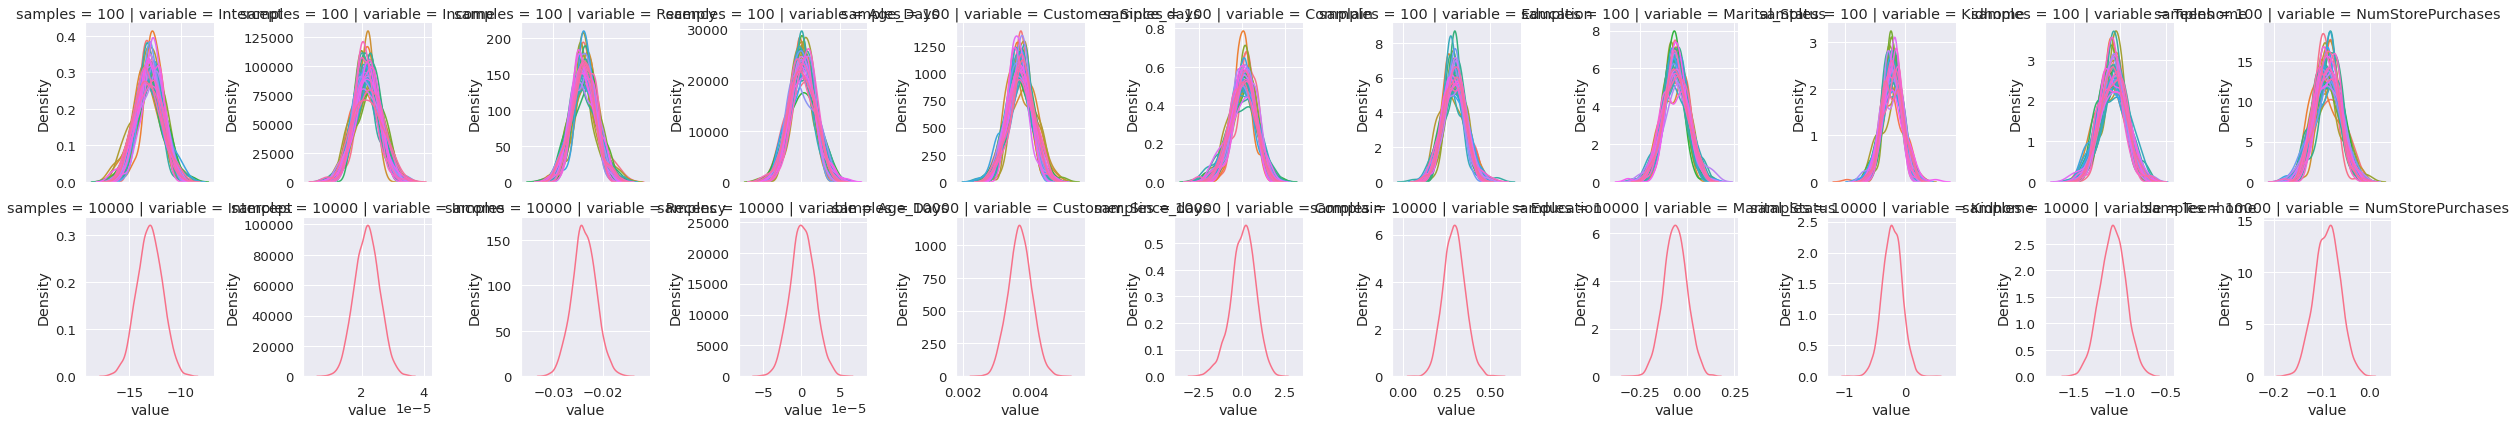

In [85]:
g = sns.FacetGrid(trace_df_long, col='variable', row='samples',
                  hue='chain', sharex='col', sharey=False)
g = g.map(sns.distplot, 'value', hist=False, rug=False)

**Estimate Odds Ratio**

An odds ratio (OR) is a measure of association between a certain property A and a second property B in a population. Specifically, it tells you how the presence or absence of property A has an effect on the presence or absence of property B.

The OR is also used to figure out if a particular exposure (like eating processed meat) is a risk factor for a particular outcome (such as colon cancer), and to compare the various risk factors for that outcome. As long as you have two properties you think are linked, you can calculate the odds.

In [92]:
b = trace['Recency']
lb, ub = np.percentile(b, 2.5), np.percentile(b, 97.5)
lb, ub = np.exp(lb), np.exp(ub)
print(f'P({lb:.3f} < Odds Ratio < {ub:.3f}) = 0.95')

P(0.972 < Odds Ratio < 0.981) = 0.95


We can interpret something along those lines: "With probability  0.95 the odds ratio is greater than  0.972 and less than  0.981 so the recency effect takes place because a person with a longer time since last purchase (recency) has at least  0.972 higher probability to respond to campaign than a person with a lesser days since last purchase, while holding all the other variables constant.

**Computing Credible Intervals**

We can compute the credible intervals, the Bayesian counterpart of confidence intervals, as percentiles of the trace. The resulting boundaries reflect our confidence about the range of the parameter value for a given probability threshold, as opposed to the number of times the parameter will be within this range for a large number of trials.

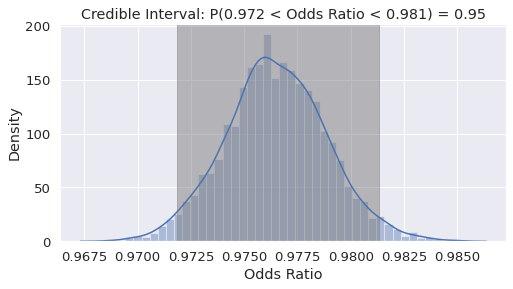

In [93]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.distplot(np.exp(b), axlabel='Odds Ratio', ax=ax)
ax.set_title(f'Credible Interval: P({lb:.3f} < Odds Ratio < {ub:.3f}) = 0.95')
ax.axvspan(lb, ub, alpha=0.5, color='gray');

**Variational Inference**


Variational Inference (VI) is a machine learning method that approximates probability densities through optimization. In the Bayesian context, it approximates the posterior distribution as follows:

1. Select a parametrized family of probability distributions
2. Find the member of this family closest to the target, as measured by Kullback-Leibler divergence


Compared to MCMC, Variational Bayes tends to converge faster and scales to large data better. While MCMC approximates the posterior with samples from the chain that will eventually converge arbitrarily close to the target, variational algorithms approximate the posterior with the result of the optimization, which is not guaranteed to coincide with the target.

Variational Inference is better suited for large datasets and to quickly explore many models.In contrast, MCMC will deliver more accurate results on smaller datasets or when time and computational resources pose fewer constraints.

**Run Automatic Differentation Variational Inference (ADVI)**

The interface for variational inference is very similar to the MCMC implementation. We just use the fit() instead of the sample() function, with the option to include an early stopping CheckParametersConvergence callback if the distribution-fitting process converged up to a given tolerance:

In [94]:
with logistic_model:
    callback = CheckParametersConvergence(diff='absolute')
    approx = pm.fit(n=100000, callbacks=[callback])

**Persist Result**

In [95]:
with open(model_path / 'logistic_model_advi.pkl', 'wb') as buff:
    pickle.dump({'model': logistic_model,
                 'approx': approx}, buff)

**Sample from approximated distribution**

We can draw samples from the approximated distribution to obtain a trace object as above for the MCMC sampler:

In [96]:
trace_advi = approx.sample(2000)

In [97]:
pm.summary(trace_advi)

Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,4.490,14.947,-22.444,33.353,0.330,0.256,2046.0,1829.0,NaN
Income,4.876,5.635,-6.162,14.881,0.124,0.088,2066.0,1820.0,NaN
Recency,3.247,10.329,-15.631,22.610,0.234,0.168,1949.0,1821.0,NaN
Age_Days,4.804,7.682,-10.357,18.905,0.170,0.123,2044.0,2003.0,NaN
Customer_Since_days,4.943,8.682,-11.611,20.966,0.196,0.139,1962.0,1959.0,NaN
Complain,-0.319,20.424,-37.942,37.371,0.450,0.328,2062.0,1956.0,NaN
Education,5.174,13.442,-19.643,30.677,0.311,0.220,1853.0,1926.0,NaN
Marital_Status,5.139,12.803,-17.724,30.390,0.284,0.201,2038.0,1921.0,NaN
Kidhome,2.648,16.784,-27.524,34.372,0.353,0.271,2268.0,2004.0,NaN
Teenhome,1.811,18.127,-34.635,34.343,0.410,0.294,1972.0,2004.0,NaN


Let us visualize the covariance structure of the model

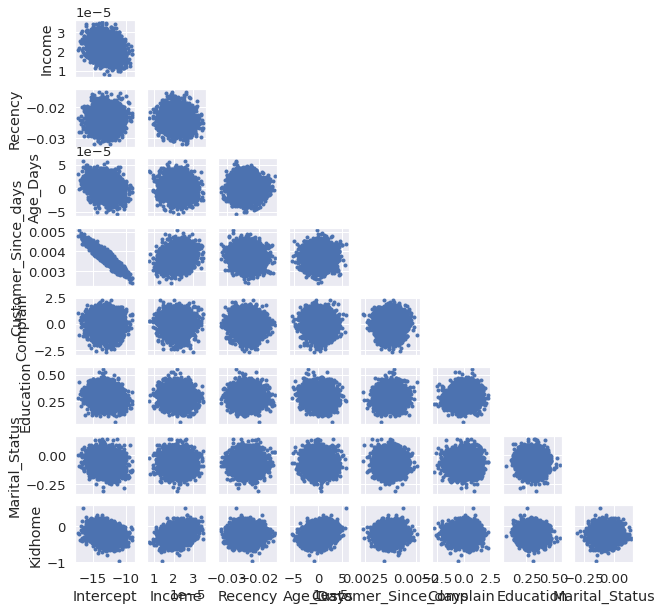

In [98]:
az.plot_pair(trace_NUTS, figsize=(10, 10));

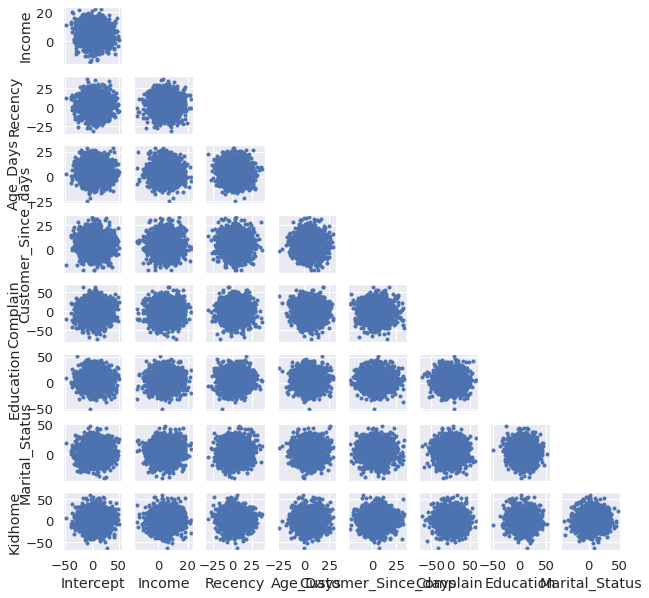

In [99]:
az.plot_pair(trace_advi, figsize=(10, 10));

Clearly, ADVI does not capture (as expected) the interactions between variables because of the mean field approximation, and so it overestimates the overall variance.

**Model Diagnostics**

Bayesian model diagnostics includes validating that the sampling process has converged and consistently samples from high-probability areas of the posterior, and confirming that the model represents the data well.

For high-dimensional models with many variables, it becomes cumbersome to inspect numerous traces. When using NUTS, the energy plot helps to assess problems of convergence. It summarizes how efficiently the random process explores the posterior. The plot shows the energy and the energy transition matrix that should be well matched as in the below example.

**Energy Plot**

When using NUTS, the energy plot helps to assess problems of convergence. It summarizes how efficiently the random process explores the posterior. The plot shows the energy and the energy transition matrix, which should be well-matched.

<AxesSubplot:>

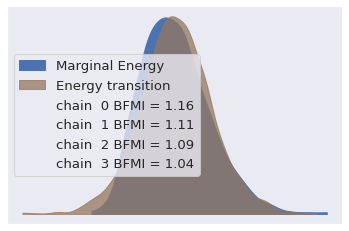

In [100]:
pm.energyplot(trace_NUTS)

**Forest Plot**


A forest plot, also known as a blobbogram, is a graphical display of estimated results from a number of scientific studies addressing the same question, along with the overall results. It was developed for use in medical research as a means of graphically representing a meta-analysis of the results of randomized controlled trials.

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

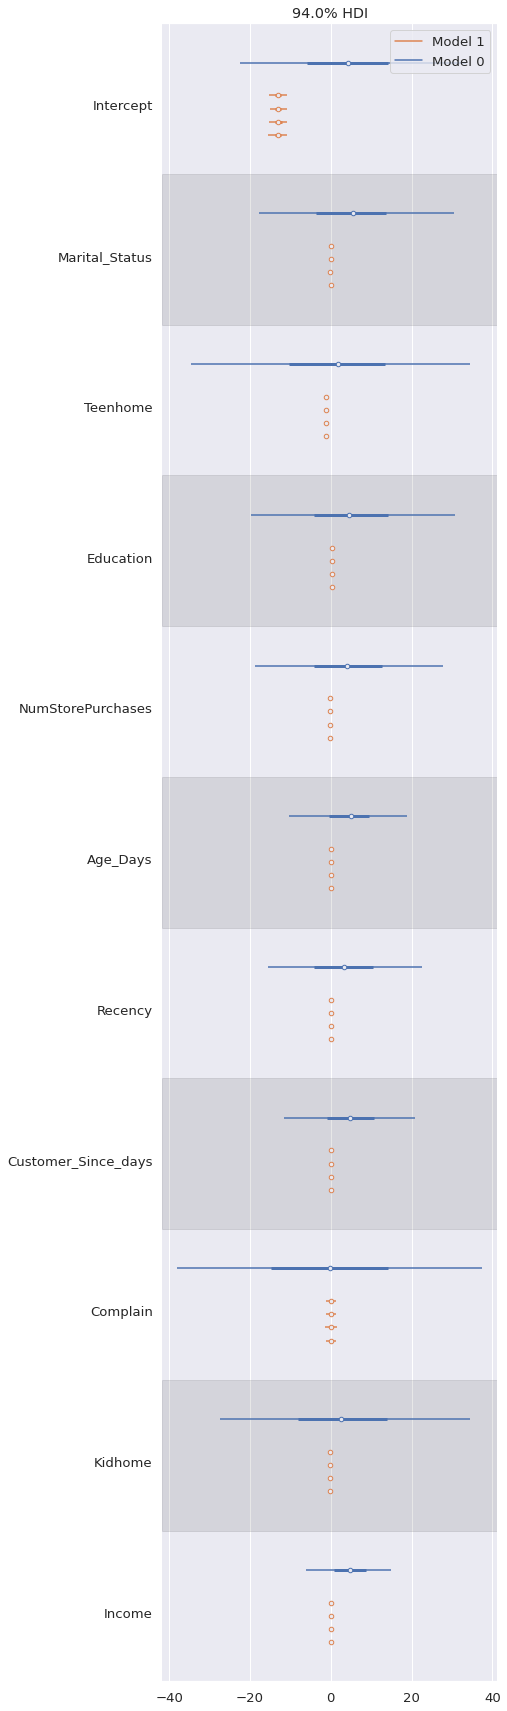

In [101]:
az.plot_forest([trace_advi, trace_NUTS])

**Posterior Plot**

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'Age_Days'}>,
        <AxesSubplot:title={'center':'Customer_Since_days'}>,
        <AxesSubplot:title={'center':'Complain'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Kidhome'}>],
       [<AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:>]], dtype=object)

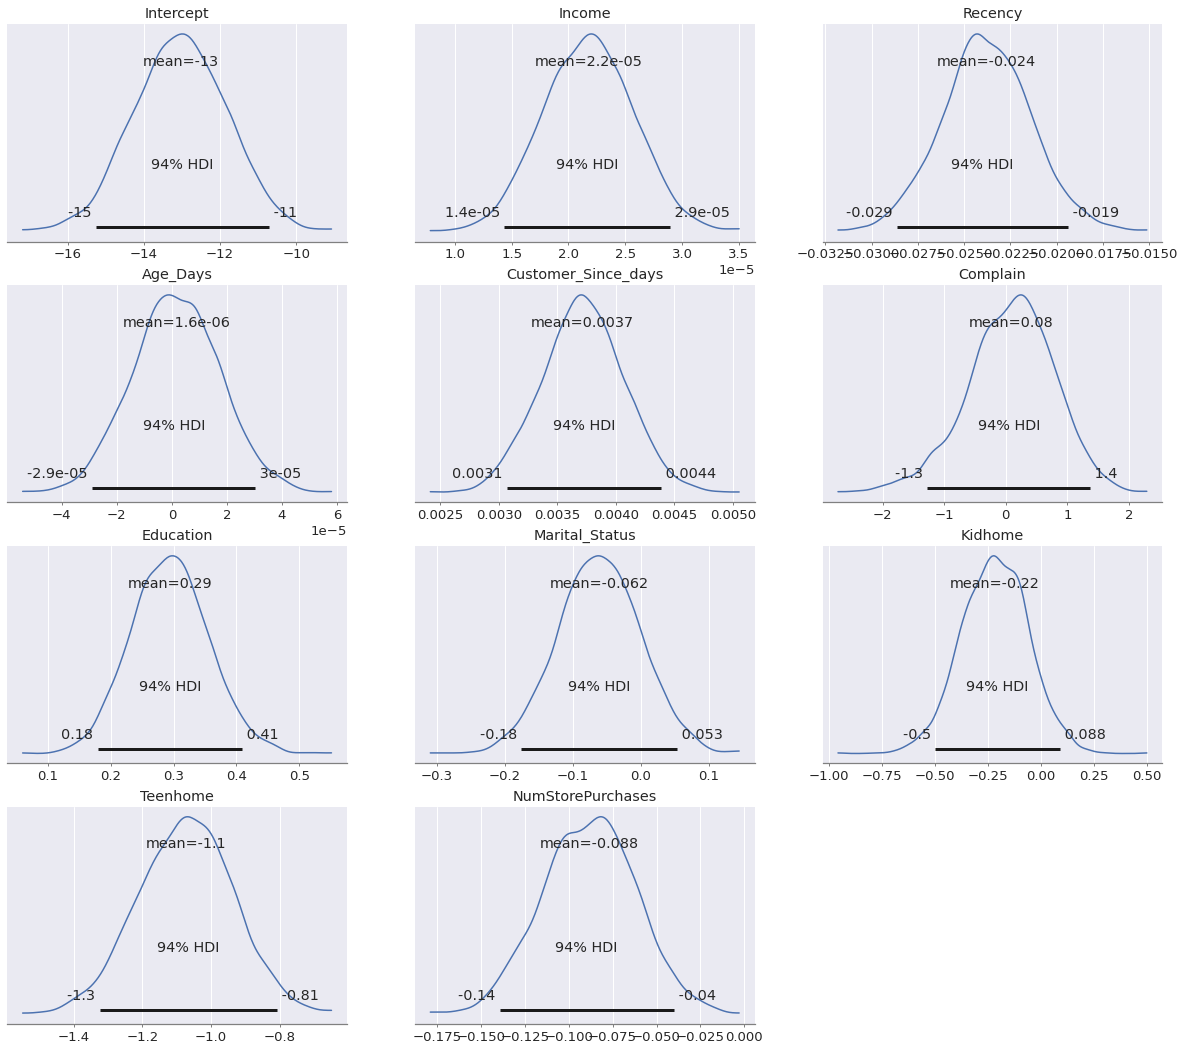

In [102]:
pm.plot_posterior(trace_NUTS)

**Posterior Predictive Checks**

PPCs are very useful for examining how well a model fits the data. They do so by generating data from the model using parameters from draws from the posterior. We use the function pm.sample_ppc for this purpose and obtain n samples for each observation (the GLM module automatically names the outcome y):

In [103]:
ppc = pm.sample_posterior_predictive(trace_NUTS, samples=500, model=logistic_model)

In [104]:
ppc['y'].shape

(500, 2216)

**Check AUC Score**

In [105]:
y_score = np.mean(ppc['y'], axis=0)

In [107]:
pred_scores = dict(y_true=data.Response,y_score=y_score)
roc_auc_score(**pred_scores)

0.809293361337971

## Prediction

Predictions use theano’s shared variables to replace the training data with test data before running posterior predictive checks. To facilitate visualization, we create the train and test datasets, and convert the former to a shared variable. Note that we need to use numpy arrays and provide a list of column labels:

In [110]:
#Train-test split

X = data.drop('Response', axis=1)
y = data.Response
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
labels = X_train.columns

In [111]:
#Create shared theano variable

X_shared = theano.shared(X_train.values)

In [113]:
# Define logistic model

with pm.Model() as logistic_model_pred:
    pm.glm.GLM(x=X_shared, labels=labels,
               y=y_train, family=pm.glm.families.Binomial())

**Run NUTS sampler**

In [114]:
with logistic_model_pred:
    pred_trace = pm.sample(draws=1000, 
                           tune=1000,
                           chains=2,
                           cores=2,
                           init='adapt_diag')

**Replace shared variable with test set**

We then run the sampler as before, and apply the pm.sample_ppc function to the resulting trace after replacing the train with test data:

In [115]:
X_shared.set_value(X_test)

In [116]:
ppc = pm.sample_posterior_predictive(pred_trace,
                    model=logistic_model_pred,
                    samples=100)

**AUC Score**

In [117]:
y_score = np.mean(ppc['y'], axis=0)
roc_auc_score(y_score=np.mean(ppc['y'], axis=0), 
              y_true=y_test)

0.8849856443168383

In [118]:
pred_scores = dict(y_true=y_test, y_score=y_score)
cols = ['False Positive Rate', 'True Positive Rate', 'threshold']
roc = pd.DataFrame(dict(zip(cols, roc_curve(**pred_scores))))

**Precision and Recall Curve**

In [119]:
precision, recall, ts = precision_recall_curve(y_true=y_test, probas_pred=y_score)
pr_curve = pd.DataFrame({'Precision': precision, 'Recall': recall})

**F1 - Score**

In [120]:
f1 = pd.Series({t: f1_score(y_true=y_test, y_pred=y_score>t) for t in ts})
best_threshold = f1.idxmax()

**Plotting Results of Evaluation**

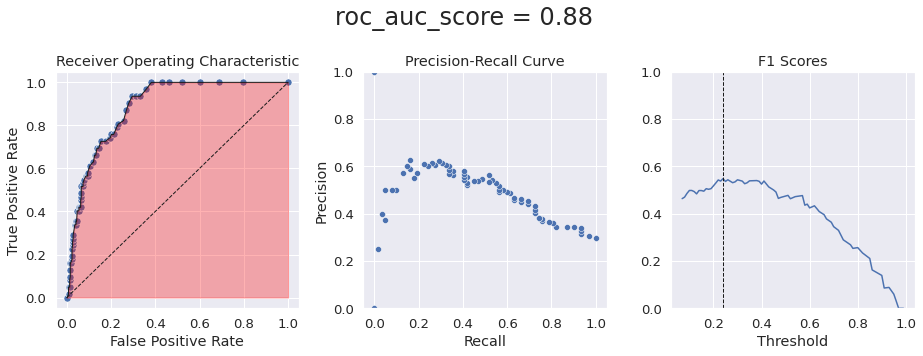

In [121]:
fig, axes = plt.subplots(ncols=3, figsize=(13, 5))

ax = sns.scatterplot(x='False Positive Rate', y='True Positive Rate', data=roc, s=50, legend=False, ax=axes[0])
axes[0].plot('False Positive Rate', 'True Positive Rate', data=roc, lw=1, color='k')
axes[0].plot(np.linspace(0,1,100), np.linspace(0,1,100), color='k', ls='--', lw=1)
axes[0].fill_between(y1=roc['True Positive Rate'], x=roc['False Positive Rate'], alpha=.3, color='red')
axes[0].set_title('Receiver Operating Characteristic')


sns.scatterplot(x='Recall', y='Precision', data=pr_curve, ax=axes[1])
axes[1].set_ylim(0,1)
axes[1].set_title('Precision-Recall Curve')


f1.plot(ax=axes[2], title='F1 Scores', ylim=(0,1))
axes[2].set_xlabel('Threshold')
axes[2].axvline(best_threshold, lw=1, ls='--', color='k')
#axes[2].text(text=f'Max F1 @ {best_threshold:.2f}', x=.60, y=.95, s=5)
fig.suptitle(f'roc_auc_score = {round(roc_auc_score(**pred_scores),2)}', fontsize=24)
fig.tight_layout()
plt.subplots_adjust(top=.8)
plt.show()

# Conclusion

There seems to be a significant improvement in performance with MCMC (with NUTS sampling) as compared to ML Classification aglorithm.

   * **ML Classification (Gradient Boosting without FS or CV) AUC = 0.723**
   * **MCMC (with NUTS) AUC: 0.885**

* MCMC took a lot of time to sample and run (approx 50 mins) but it did provide significant improvement in performance.

* MCMC can possibly provide even better results provided we have more data at hand. Although that will obviously increase the time to run.

* ML algorithm is faster and more widely accepted in the industry.

* MCMC has great potential given computational power is available to data scientists.